<a href="https://colab.research.google.com/github/DarioDell/Multivariate_time_series/blob/main/VAR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Development of a VAR model with multivariate time series

1. Exploratory data analysis.
2. Split the series into training and test sets.
3. Stationarity test.
4. Transformation of the training series.
5. Construction of a VAR model on the transformed series.
6. Granger Causality.
7. Model diagnosis.
8. The forecast is made using the finally chosen model.
9. Inverse transformation of the forecast to the original scale.
10. The forecast evaluation is carried out.

# Data: <u>commodity_futures.csv</u>

The dataset was obtained from the website: https://www.kaggle.com/.<br>
It contains information on the values ​​of the most relevant commodities in Europe, from the year 2000 to mid-2024.<br>
The main OBJECTIVE of this project is to create a VAR model capable of making accurate forecasts. Prepared training data will be passed to this model, which will be used to exercise it, reserving a data sample (test) to later compare the results obtained with the real ones and obtain clear conclusions about its performance.

In [ ]:
# The necessary libraries for the project are imported

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.api import VAR
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.metrics import mean_absolute_error, mean_squared_error

from google.colab import files

In [ ]:
# values ​​with two decimal places

pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df = pd.read_csv('commodity_futures.csv', parse_dates= ['Date'])
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,"1,237.50",NaN,"8,446.00",247.50,6.10,NaN,116.50,55.98,274.25,51.07
1,2000-01-04,2.18,283.70,25.55,24.39,464.25,203.00,0.85,5.38,213.50,...,"1,215.00",67.78,"8,314.00",247.25,5.77,NaN,116.25,55.62,274.00,50.73
2,2000-01-05,2.17,282.10,24.91,23.73,469.25,203.00,0.86,5.21,213.00,...,"1,209.25",66.55,"8,307.00",249.75,5.81,NaN,118.60,55.08,276.25,51.56
3,2000-01-06,2.20,282.40,24.78,23.62,468.00,203.75,0.85,5.17,211.25,...,"1,212.00",66.28,"8,252.00",248.50,5.77,NaN,116.85,55.17,275.00,52.08
4,2000-01-07,2.17,282.90,24.22,23.09,471.50,207.00,0.85,5.20,205.25,...,"1,209.25",64.75,"8,174.00",251.75,5.84,NaN,114.15,55.62,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,2023-07-31,2.63,"1,970.50",81.80,85.56,"1,445.75",504.00,4.01,24.97,877.25,...,"2,571.31",299.09,"22,127.00",665.75,24.11,292.90,164.65,104.12,812.75,85.44
6088,2023-08-01,2.56,"1,940.70",81.37,84.91,"1,446.75",497.00,3.91,24.33,911.50,...,"2,574.80",302.34,"22,189.00",652.25,24.39,287.30,164.55,103.67,804.50,86.87
6089,2023-08-02,2.48,"1,937.40",79.49,83.20,"1,429.75",488.25,3.84,23.87,884.50,...,"2,486.50",300.43,"21,379.00",640.00,24.20,277.58,166.95,102.67,787.00,85.08
6090,2023-08-03,2.56,"1,932.00",81.55,85.14,"1,428.75",480.75,3.90,23.70,899.50,...,"2,494.00",307.49,"21,402.00",627.00,24.02,276.47,164.75,101.00,767.50,85.28


In [ ]:
# The following variables are eliminated because I cannot find enough information to determine their veracity.

df = df.drop(['ULS DIESEL'], axis=1)
df = df.drop(['NATURAL GAS'], axis=1)
df = df.drop(['HRW WHEAT'], axis=1)
df = df.drop(['SOYBEAN OIL'], axis=1)
df = df.drop(['SOYBEAN MEAL'], axis=1)
df = df.drop(['LOW SULPHUR GAS OIL'], axis=1)
df = df.drop(['WTI CRUDE'], axis=1)
df = df.drop(['BRENT CRUDE'], axis=1)
df = df.drop(['LIVE CATTLE'], axis=1)
df = df.drop(['LEAN HOGS'], axis=1)

The variables I am going to work with can be classified into four groups:

1.   <u>Industrial metals:</u>
*   COPPER
*   ALUMINIUM
*   ZINC
*   NICKEL<br><br>




2.   <u>Precious metals:</u>
*   GOLD
*   SILVER<br><br>


3.   <u>Grain:</u>
*   CORN
*   SOYBEANS
*   WHEAT<br><br>


4.   <u>Softs:</u>
*   SUGAR
*   COFFEE
*   COTTON

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
GOLD,float64
SOYBEANS,float64
CORN,float64
COPPER,float64
SILVER,float64
ALUMINIUM,float64
ZINC,float64
NICKEL,float64
WHEAT,float64


In [ ]:
# I set the variable 'Date' as the index of the dataframe

df = df.set_index('Date')
df.tail()

,GOLD,SOYBEANS,CORN,COPPER,SILVER,ALUMINIUM,ZINC,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,COTTON
Date,,,,,,,,,,,,,
2023-07-31,"1,970.50","1,445.75",504.00,4.01,24.97,"2,256.51","2,571.31","22,127.00",665.75,24.11,292.90,164.65,85.44
2023-08-01,"1,940.70","1,446.75",497.00,3.91,24.33,"2,221.06","2,574.80","22,189.00",652.25,24.39,287.30,164.55,86.87
2023-08-02,"1,937.40","1,429.75",488.25,3.84,23.87,"2,170.01","2,486.50","21,379.00",640.00,24.20,277.58,166.95,85.08
2023-08-03,"1,932.00","1,428.75",480.75,3.90,23.70,"2,188.00","2,494.00","21,402.00",627.00,24.02,276.47,164.75,85.28
2023-08-04,"1,939.00","1,441.00",482.50,3.86,23.68,NaN,NaN,NaN,632.00,23.78,277.45,162.55,85.48


<Axes: >

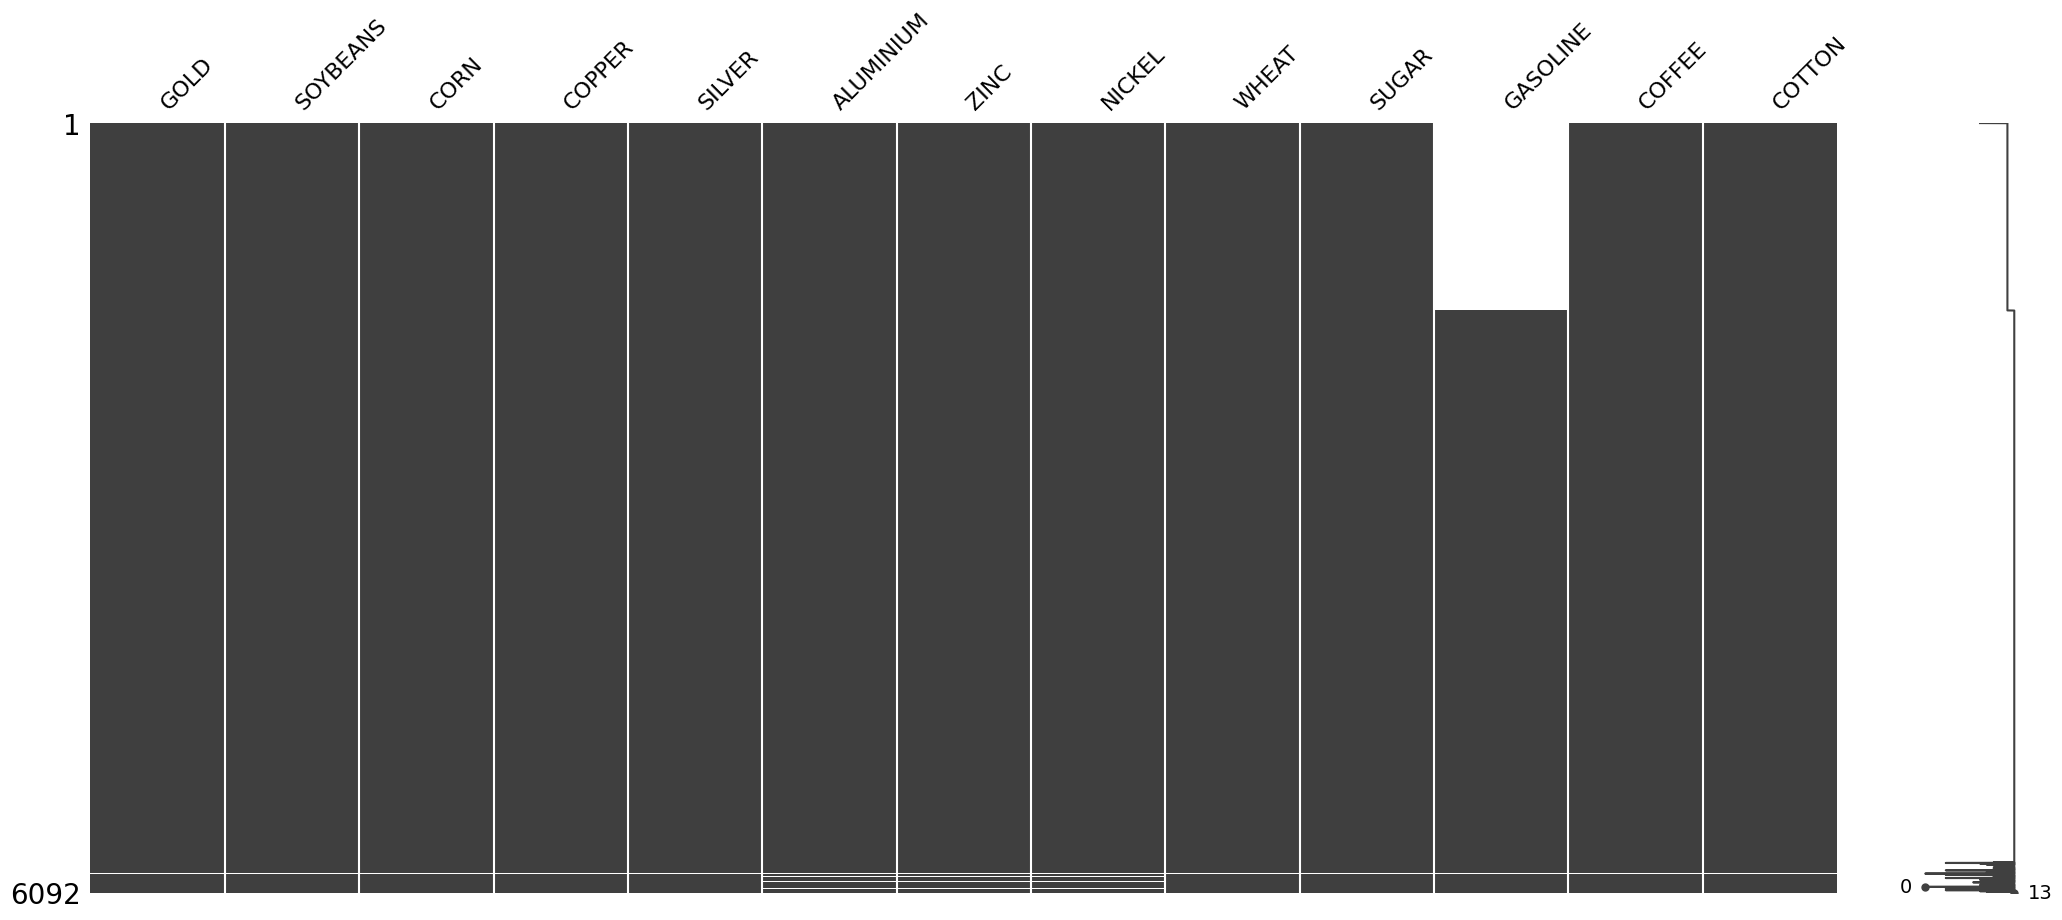

In [ ]:
# Search for null values

msno.matrix(df)

In [ ]:
# how much data is missing per column

pd.DataFrame(df.isna().sum(), columns = ['Missings'])

,Missings
GOLD,10
SOYBEANS,9
CORN,8
COPPER,9
SILVER,13
ALUMINIUM,47
ZINC,46
NICKEL,46
WHEAT,14
SUGAR,9


In [ ]:
df = df.drop(['GASOLINE'], axis=1)

In [ ]:
# I changed the data frequency to business days, because I am working with market data which is obtained from Monday to Friday

df = df.asfreq('b')

In [ ]:
# Fill missing values ​​with the 'back fill' method

df = df.fillna(method = 'bfill')
df.isna().sum()

,0
GOLD,0
SOYBEANS,0
CORN,0
COPPER,0
SILVER,0
ALUMINIUM,1
ZINC,1
NICKEL,1
WHEAT,0
SUGAR,0


In [ ]:
# I fill the last three missing values ​​with the average of each column

df['ALUMINIUM'].fillna(value= df['ALUMINIUM'].mean(), inplace=True)
df['ZINC'].fillna(value= df['ZINC'].mean(), inplace=True)
df['NICKEL'].fillna(value= df['NICKEL'].mean(), inplace=True)

In [ ]:
# There are no more missing values

df.isna().sum()

,0
GOLD,0
SOYBEANS,0
CORN,0
COPPER,0
SILVER,0
ALUMINIUM,0
ZINC,0
NICKEL,0
WHEAT,0
SUGAR,0


In [ ]:
df1  = df.copy()
df1.columns

Index(['GOLD', 'SOYBEANS', 'CORN', 'COPPER', 'SILVER', 'ALUMINIUM', 'ZINC',
       'NICKEL', 'WHEAT', 'SUGAR', 'COFFEE', 'COTTON'],
      dtype='object')

In [ ]:
# statistical summary of all variables

df1[['GOLD','SILVER','COPPER','ALUMINIUM','ZINC', 'NICKEL']].describe()

,GOLD,SILVER,COPPER,ALUMINIUM,ZINC,NICKEL
count,"6,155.00","6,155.00","6,155.00","6,155.00","6,155.00","6,155.00"
mean,"1,069.20",16.12,2.62,"1,976.95","2,088.72","16,187.24"
std,533.51,8.45,1.13,452.02,849.26,"7,762.13"
min,255.10,4.03,0.61,"1,246.00",724.00,"4,350.00"
25%,492.60,8.21,1.66,"1,632.50","1,308.25","10,660.38"
50%,"1,202.30",16.27,2.85,"1,883.25","2,082.00","14,708.50"
75%,"1,474.25",20.68,3.45,"2,275.12","2,637.00","19,429.50"
max,"2,055.70",48.58,4.93,"3,875.50","4,594.00","53,750.00"


In [ ]:
df1[['CORN','SOYBEANS','WHEAT','SUGAR', 'COFFEE','COTTON']].describe()

,CORN,SOYBEANS,WHEAT,SUGAR,COFFEE,COTTON
count,"6,155.00","6,155.00","6,155.00","6,155.00","6,155.00","6,155.00"
mean,403.89,981.50,528.17,14.48,128.63,71.29
std,165.30,343.63,190.46,5.87,50.70,25.17
min,174.75,418.00,233.50,4.65,41.50,28.52
25%,251.50,663.88,378.00,9.94,99.28,55.53
50%,369.00,957.00,505.00,13.64,121.15,66.83
75%,514.38,"1,285.38",653.75,18.24,150.90,81.81
max,831.25,"1,771.00","1,425.25",35.31,304.90,215.15


# Exploratory data analysis

In [ ]:
list = ['GOLD', 'SOYBEANS', 'CORN', 'COPPER', 'SILVER',
       'ALUMINIUM', 'ZINC','NICKEL', 'WHEAT', 'SUGAR', 'COFFEE',
       'COTTON']

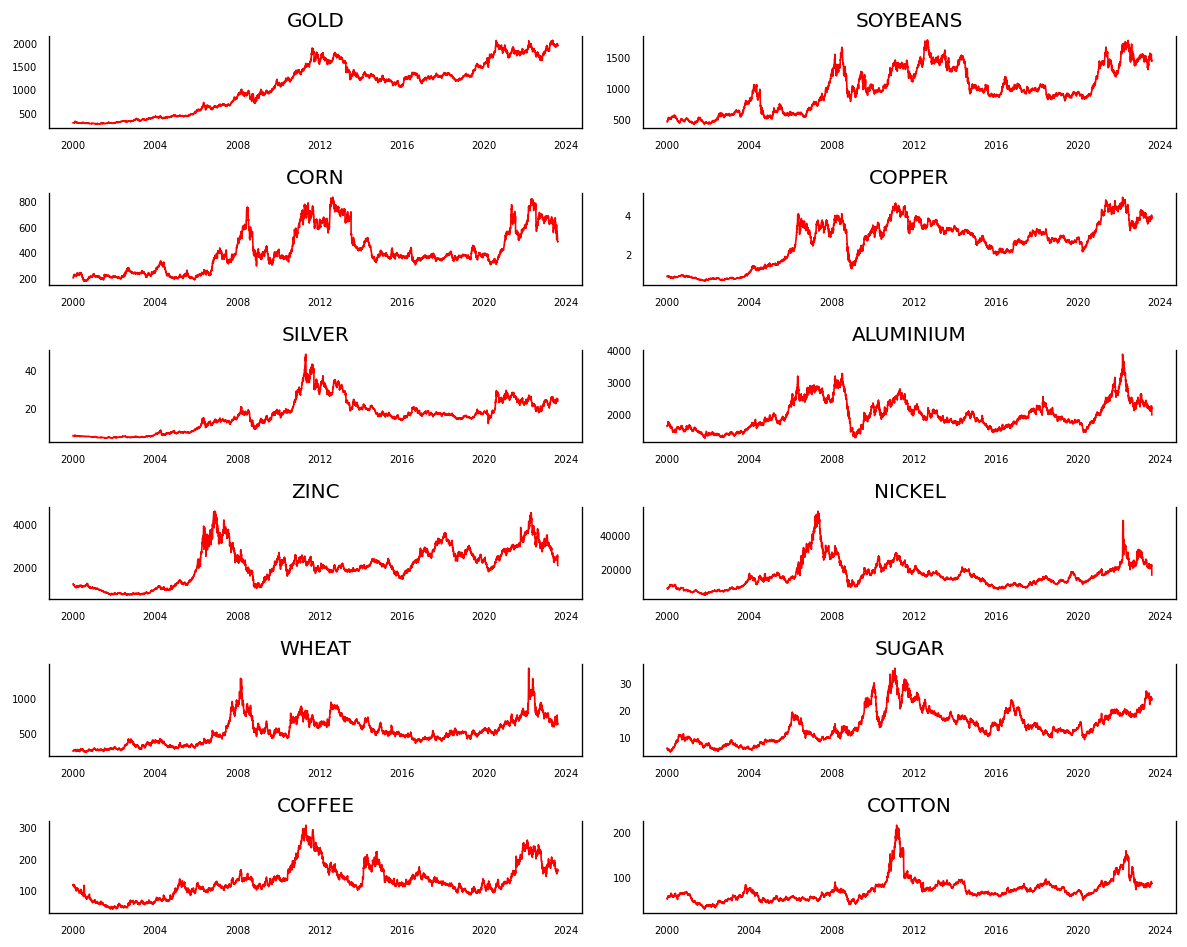

In [ ]:
# The time series are displayed below:

fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
 data = df1[df1.columns[i]]
 ax.plot(data, color='red', linewidth=1)
 ax.set_title(df1.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines['top'].set_alpha(0)
 ax.tick_params(labelsize=6)
 plt.tight_layout()

# At first sight, a similar increasing trend can be seen in most of the graphs, coinciding with some dates.
# They may be correlated.

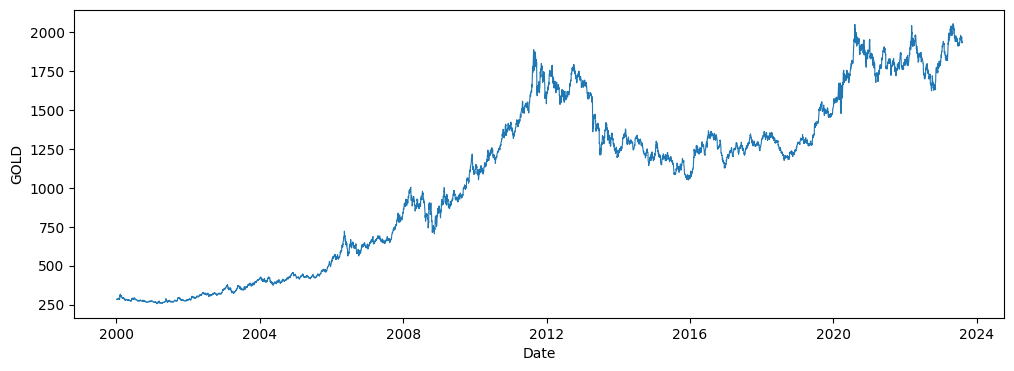

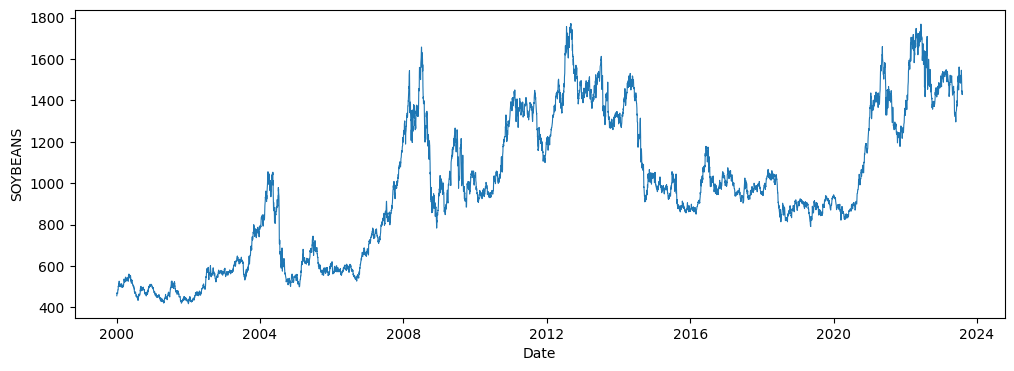

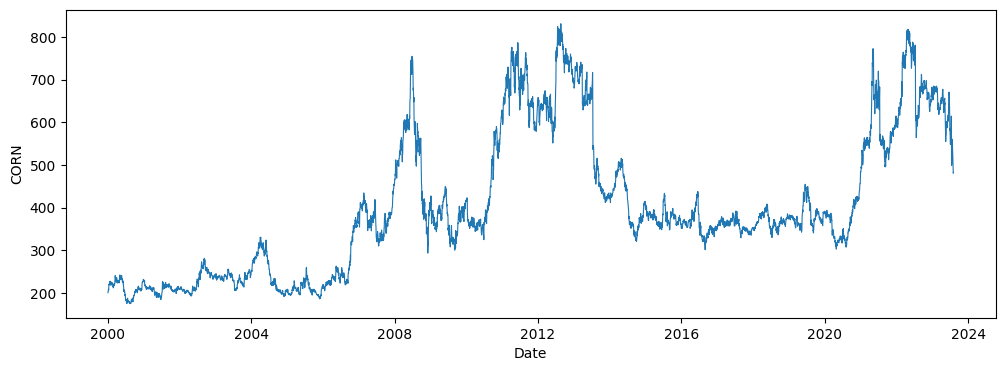

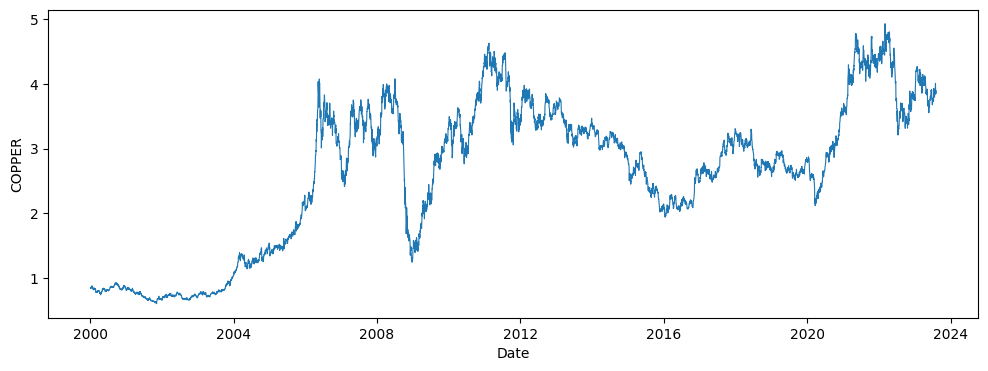

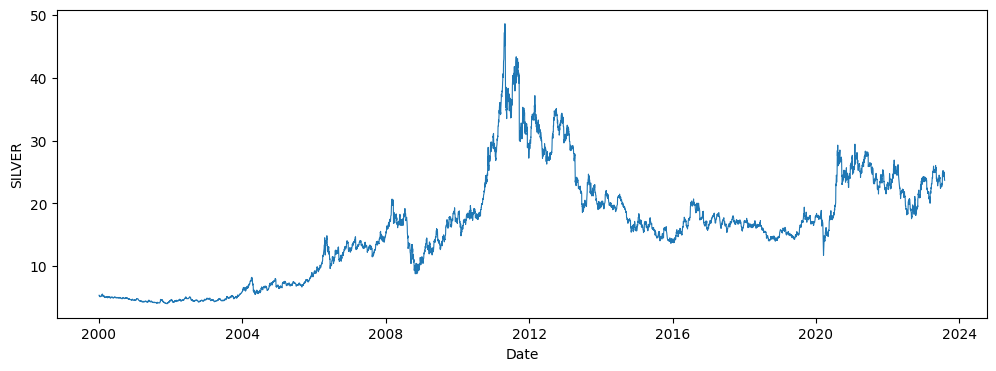

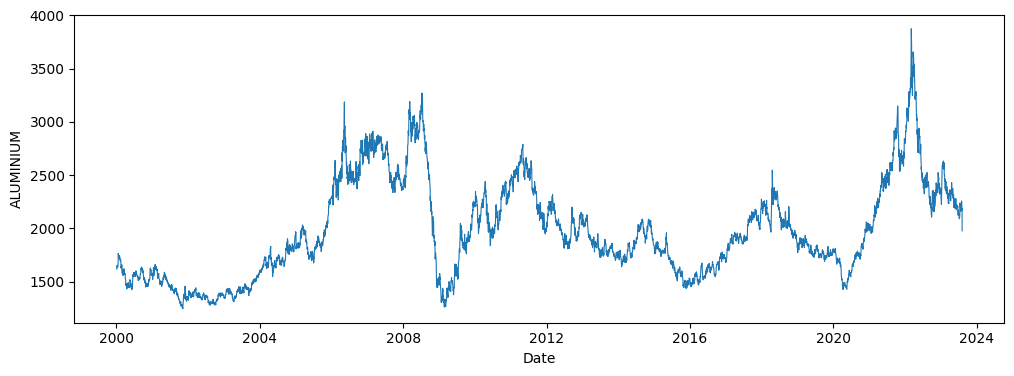

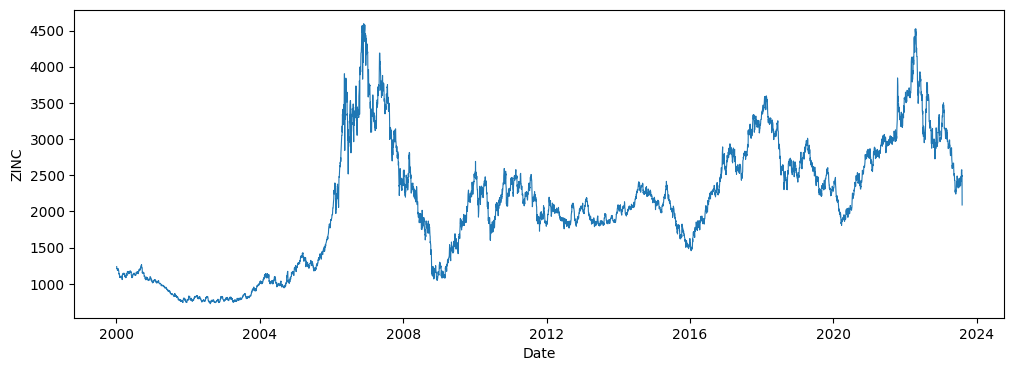

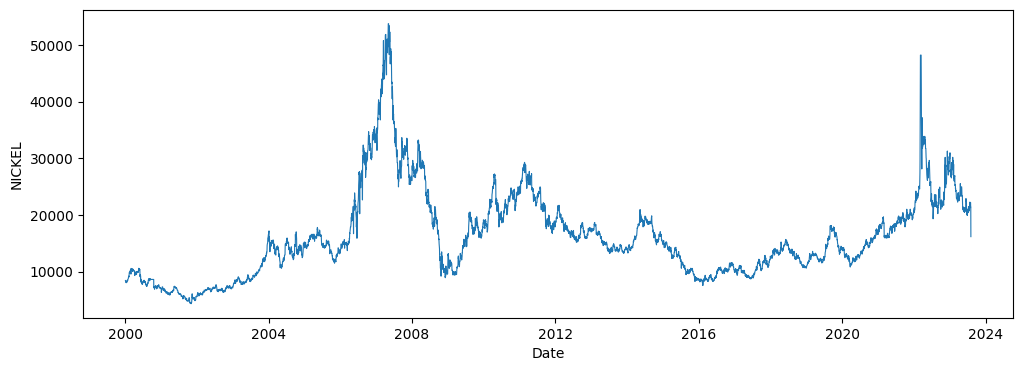

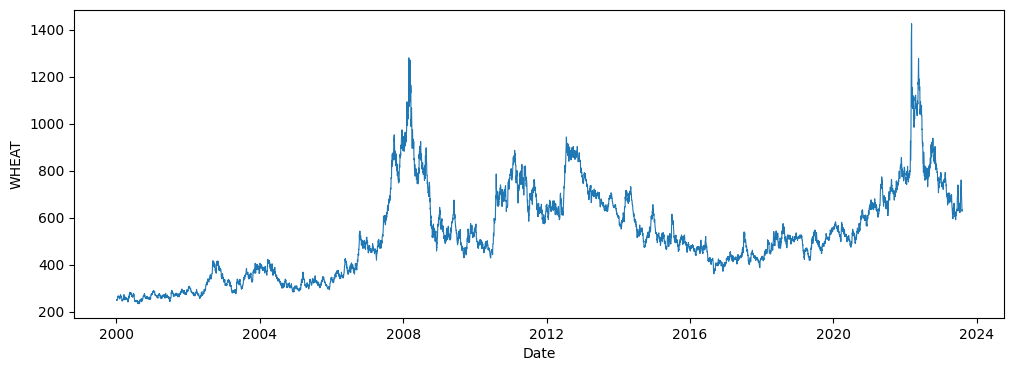

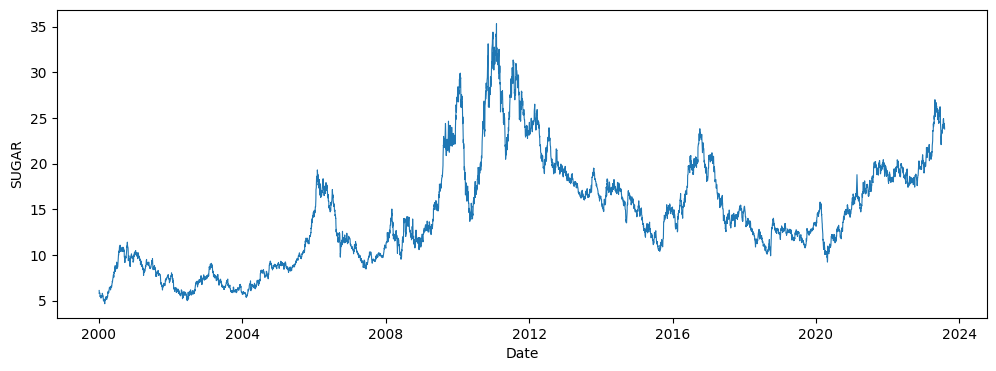

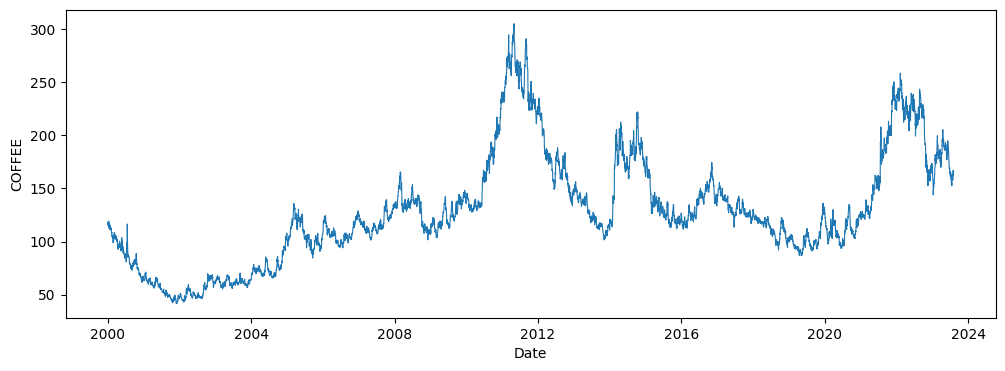

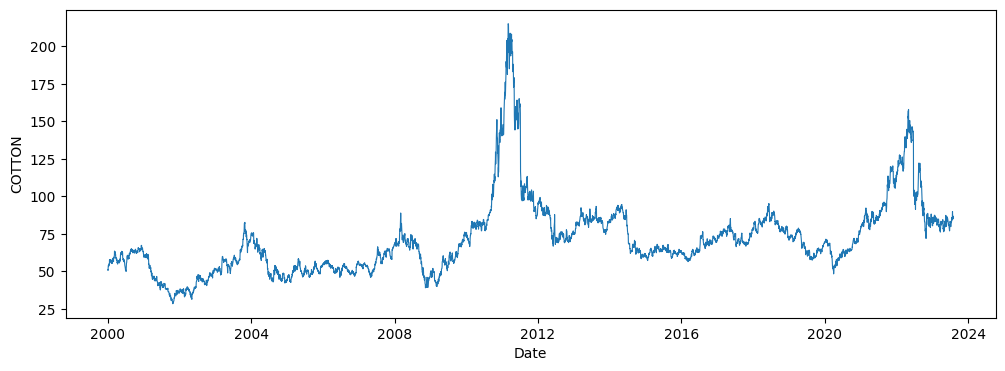

In [ ]:
# I represent the individual graphs to observe them in a more particular way using the 'seaborn' library

for i in list:
  fig, ax = plt.subplots(figsize = (12,4))
  sns.lineplot(data = df1, y= i, x= 'Date', linewidth= .8)
  plt.show()

I choose the <u>'GOLD'</u> variable to do a more detailed analysis.<br>
In this data set, the price of gold is stated in "troy ounce", a measurement used mainly in the market for precious metals, such as gold, silver and platinum. For reference: 1 troy ounce is equivalent to 31.10 grams.<br>
It must be taken into account that gold is the most precious commodity above any other throughout history. This is due to several factors, among which are:
* Its durability
* Its shortage and intrinsic value
* Universal acceptance
* Stability of value that is maintained over the centuries

Due to these characteristics, gold has traditionally been used as a medium of exchange and as a store of value in times of economic uncertainty or financial crises. However, it is important to note that while gold has historically played a key role as the most valued exchange commodity, its relevance in the modern economy may be affected by factors such as the evolution of financial, technological and regulatory systems.

* During 2000-2011 a gradual increase is observed. The first notable peak is seen in 2008, the year in which a global economic crisis breaks out with a significant impact for Europe. Gold saw a rise in value due to its status as a safe asset, as investors sought refuge amid economic uncertainty.

* During 2011-2013, notable peaks are observed. In mid-2011 the price of gold reached record levels in Europe, exceeding $1,900 per ounce due to the sovereign debt crisis in the eurozone and global economic uncertainty.
<br>
* In the following years and until 2015, the price experienced downward corrections, believed to be due to the strength of the dollar and expectations of a tightening of monetary policy in the United States.

* During 2015-2020 the price of gold showed some stability, but also experienced rallies in response to events such as Brexit (in 2016), generating political and economic uncertainty in Europe.

* 2020 onwards: The COVID-19 pandemic in 2020 fueled strong demand for gold as a safe haven asset, resulting in a significant increase in its price in Europe and around the world. The price of gold experienced a broad rally in Europe, reaching new all-time highs due to economic uncertainty, unprecedented fiscal and monetary stimulus, and inflation concerns.<br>

As a summary, it can be established that during the last 20 years, the price of gold has seen a general upward trend in Europe, driven by factors such as economic uncertainty, the weakness of the dollar, monetary and fiscal policies, as well as events significant geopolitics.


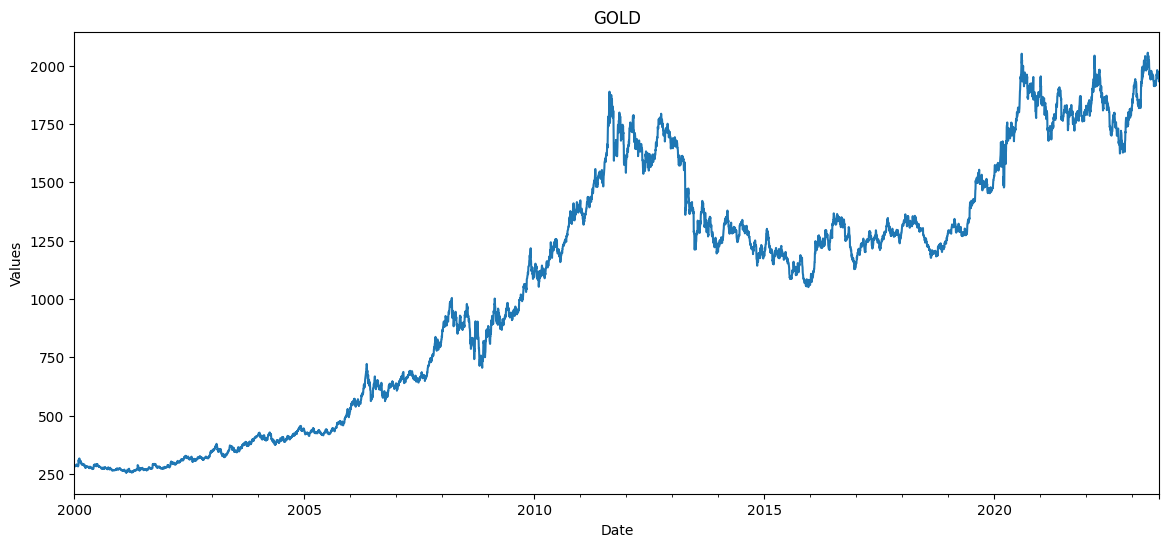

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

df1.GOLD.plot(ax=ax, color='C0', legend=False)

ax.set_ylabel('Values')
ax.set_title('GOLD');

GOLD


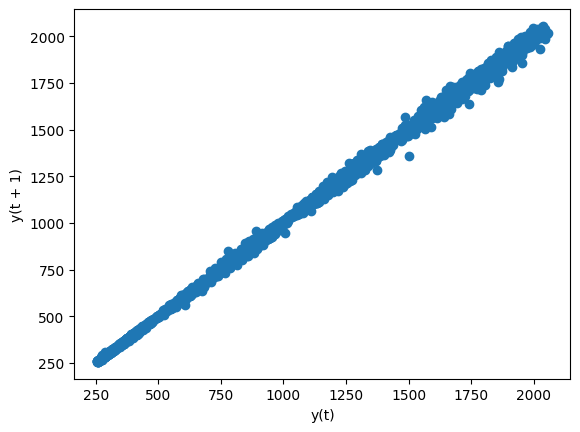

SOYBEANS


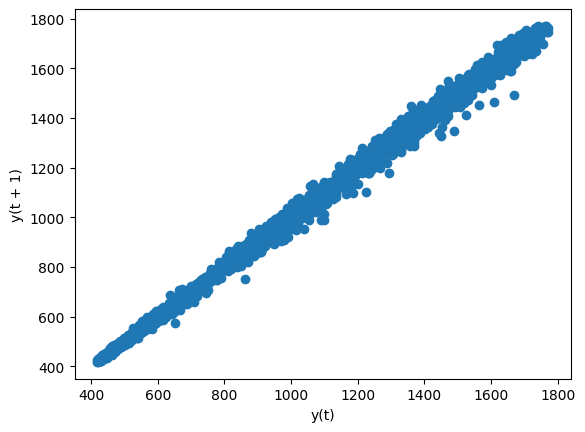

CORN


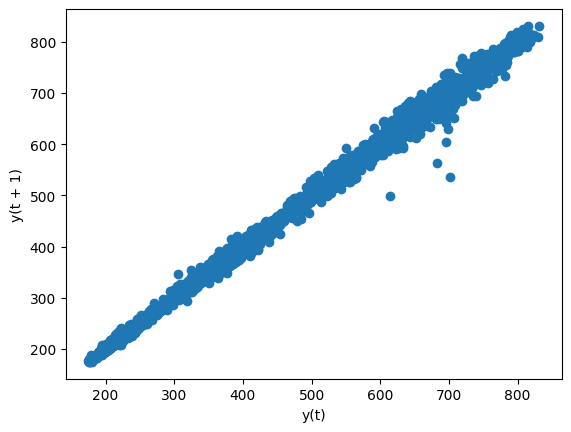

COPPER


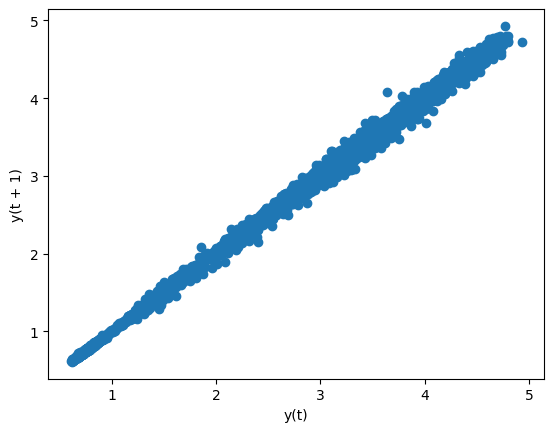

SILVER


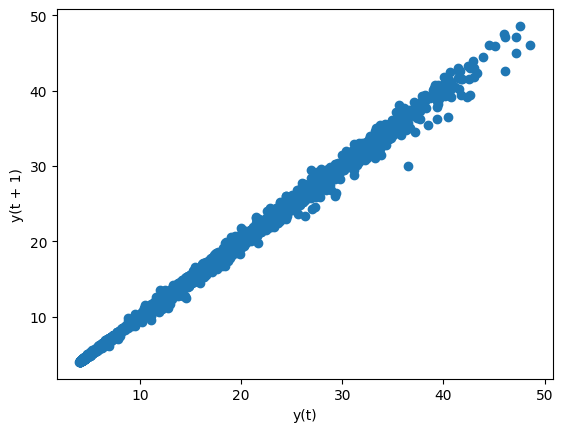

ALUMINIUM


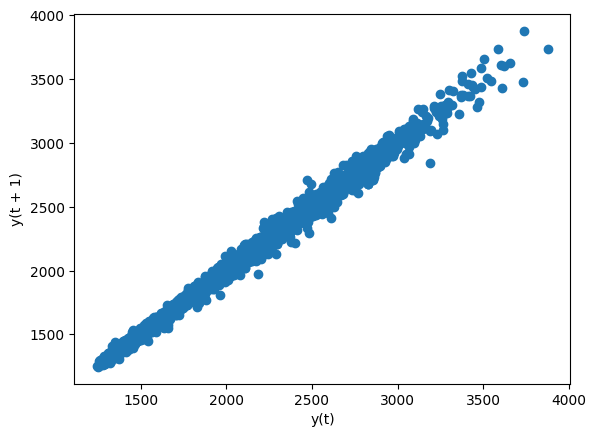

ZINC


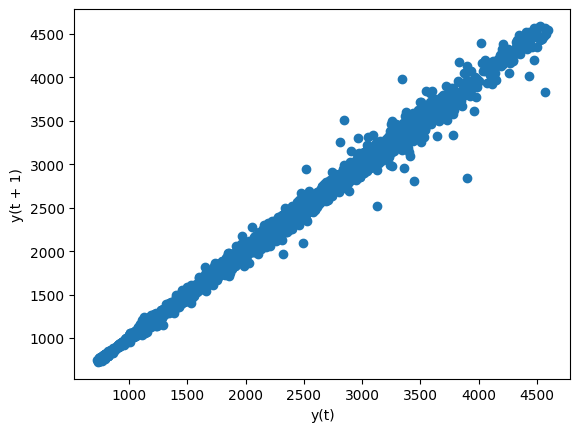

NICKEL


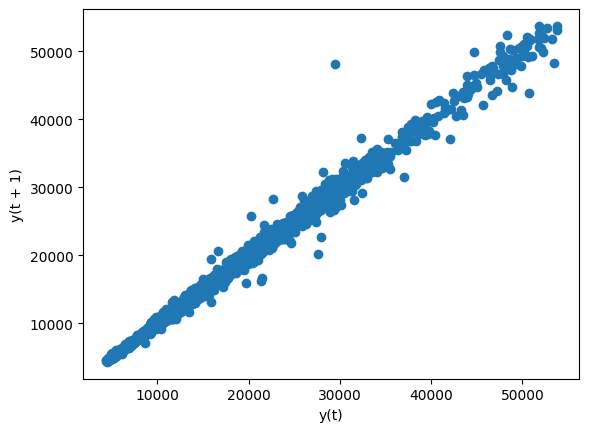

WHEAT


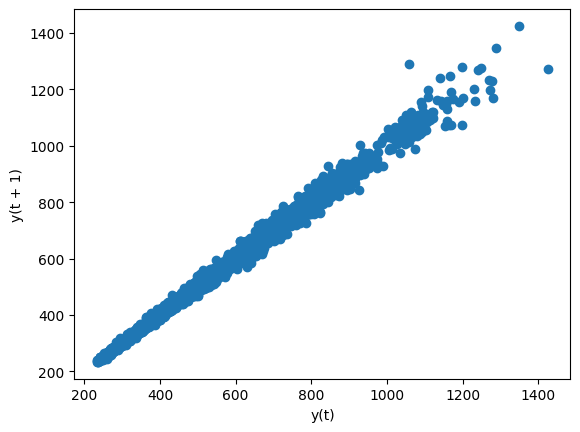

SUGAR


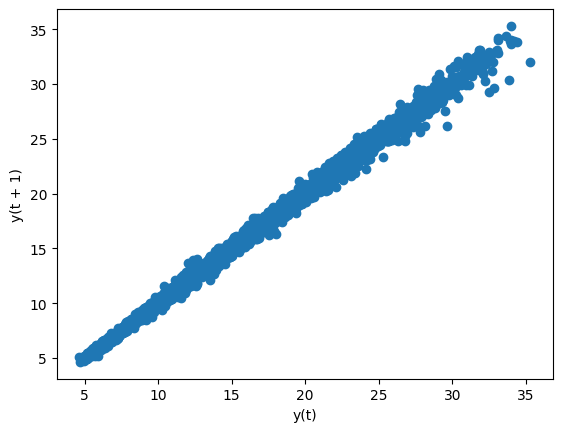

COFFEE


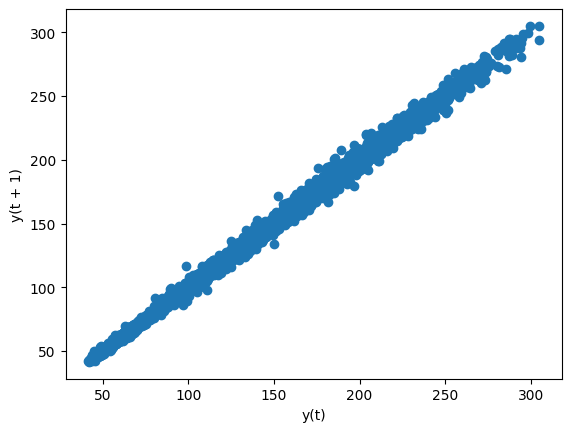

COTTON


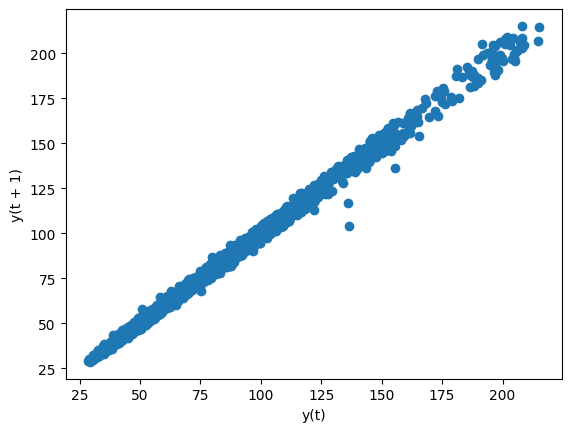

In [ ]:
for i in list:
  print(i)
  lag_plot(df1[i])
  plt.show()

# lag_plot is a function most frequently used to find patterns in time series data. I try to find or identify guidelines and patterns that can specify each variable.
# The propensity of points on the diagonals of the graphs indicates that there is an autoregressive process. Little dispersion of the points is observed, rather they are centered on the diagonals.

In [ ]:
# The correlation matrix is ​​calculated

corr = df1.corr()
corr

,GOLD,SOYBEANS,CORN,COPPER,SILVER,ALUMINIUM,ZINC,NICKEL,WHEAT,SUGAR,COFFEE,COTTON
GOLD,1.00,0.82,0.79,0.82,0.88,0.40,0.61,0.30,0.71,0.72,0.73,0.62
SOYBEANS,0.82,1.00,0.93,0.82,0.84,0.50,0.48,0.42,0.88,0.70,0.76,0.68
CORN,0.79,0.93,1.00,0.81,0.87,0.56,0.47,0.48,0.88,0.71,0.79,0.72
COPPER,0.82,0.82,0.81,1.00,0.85,0.79,0.80,0.68,0.81,0.74,0.79,0.68
SILVER,0.88,0.84,0.87,0.85,1.00,0.49,0.52,0.42,0.74,0.83,0.83,0.73
ALUMINIUM,0.40,0.50,0.56,0.79,0.49,1.00,0.77,0.82,0.64,0.44,0.60,0.52
ZINC,0.61,0.48,0.47,0.80,0.52,0.77,1.00,0.68,0.54,0.45,0.53,0.44
NICKEL,0.30,0.42,0.48,0.68,0.42,0.82,0.68,1.00,0.58,0.35,0.50,0.39
WHEAT,0.71,0.88,0.88,0.81,0.74,0.64,0.54,0.58,1.00,0.58,0.72,0.64
SUGAR,0.72,0.70,0.71,0.74,0.83,0.44,0.45,0.35,0.58,1.00,0.82,0.70


<Axes: >

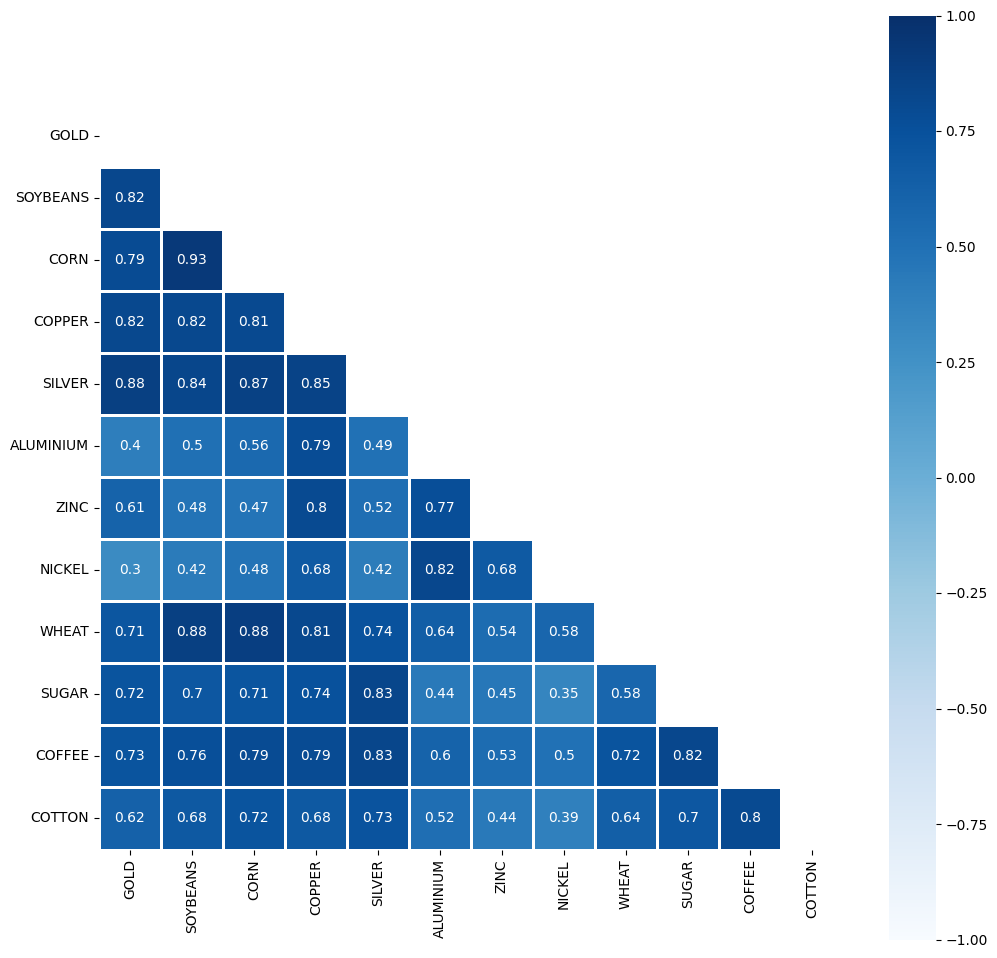

In [ ]:
# For a better analysis I make a heat map on the correlation matrix. Here I seek to identify how the variables are correlated.
# Correlations of all variables are observed, some to a greater extent than others. There are no negative correlation coefficients.

# Generating the 'mask' to make the triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# The plot is configured in terms of size
f, ax= plt.subplots(figsize = (12,12))

# The 'heatmap' is drawn with its corresponding mask
sns.heatmap(corr, mask = mask, cmap = 'Blues', vmax=1, vmin=-1, center = 0, square= True, linewidths=2 ,annot=True )

# Split the series into training and test sets

The VAR model will be fitted to the training set X_train and the model will then be used to forecast the next 15 observations.<br>
These forecasts will be compared to the actual data from the test set.<br>
I have chosen a small number of observations to save and compare later, because these multivariate time series models are very complex. I have previously carried out a test choosing the implicit rule of 80% (training data) and 20% (test data), the results have not been favorable, the model has not been precise.<br>
The more data passed to X_test, less training data there will be, which translates to less predictive ability. It is not a model capable of reaching the very distant future.<br>
That is why I have selected only 15 periods into the future.

In [ ]:
n_obs = 15
X_train, X_test = df1[0:-n_obs], df1[-n_obs:]
print(X_train.shape, X_test.shape)

(6140, 12) (15, 12)


# Stationarity test

The data must be stationary to be able to use the VAR model. I'll find out by applying an augmented Dickey-Fuller Test to each univariate variable that the dataset has.<br>
Next, I carry out an iterative process of comparing stationarity with the mentioned Test.

In [ ]:
def test_dickey_fuller(time_series):
  result = sts.adfuller(time_series.values)
  print('p-value: %f' % result[1])

print('Augmented Dickey-Fuller Test:')
print('Time series: Price of Gold')
test_dickey_fuller(X_train['GOLD'])
print('Time series: Price of Silver')
test_dickey_fuller(X_train['SILVER'])
print('Time series: Price of Soybean')
test_dickey_fuller(X_train['SOYBEANS'])
print('Time series: Price of corn')
test_dickey_fuller(X_train['CORN'])
print('Time series: Price of Copper')
test_dickey_fuller(X_train['COPPER'])
print('Time series: Price of Aluminum')
test_dickey_fuller(X_train['ALUMINIUM'])
print('Time series: Price of Zinc')
test_dickey_fuller(X_train['ZINC'])
print('Time series: Price of Nickel')
test_dickey_fuller(X_train['NICKEL'])
print('Time series: Price of wheat')
test_dickey_fuller(X_train['WHEAT'])
print('Time series: Price of Sugar')
test_dickey_fuller(X_train['SUGAR'])
print('Time series: Price of Coffee')
test_dickey_fuller(X_train['COFFEE'])
print('Time series: Price of Cotton')
test_dickey_fuller(X_train['COTTON'])

Augmented Dickey-Fuller Test:
Time series: Price of Gold
p-value: 0.882372
Time series: Price of Silver
p-value: 0.458334
Time series: Price of Soybean
p-value: 0.384089
Time series: Price of corn
p-value: 0.320909
Time series: Price of Copper
p-value: 0.374314
Time series: Price of Aluminum
p-value: 0.114418
Time series: Price of Zinc
p-value: 0.257979
Time series: Price of Nickel
p-value: 0.121533
Time series: Price of wheat
p-value: 0.096153
Time series: Price of Sugar
p-value: 0.109197
Time series: Price of Coffee
p-value: 0.376246
Time series: Price of Cotton
p-value: 0.068004



What I do is compare the p-value obtained with a significance level that is normally 0.05, which translates into 95% confidence.<br>
The augmented Dickey-Fuller test is a hypothesis testing: where the null hypothesis implies that the series is not stationary, while the alternative hypothesis establishes that the series is stationary.<br>
All p-values ​​are greater than 0.05, so the null hypothesis that the series is not stationary is accepted. The data would have to be transformed because stationarity cannot be confirmed.

# Transformation of the training series

Applying differentiation to the training set should make all 12 variables stationary. However, this is an iterative process in which, after the first differentiation, the series may still be non-stationary. In this case I should apply a second differentiation or logarithmic transformation to standardize the series.<br>
To differentiate them I will use the 'diff()' function

In [ ]:
# What dropna() will do is remove the first row because if not it will have missing data

X_train_transformed=X_train.diff().dropna()
X_train_transformed.head()

,GOLD,SOYBEANS,CORN,COPPER,SILVER,ALUMINIUM,ZINC,NICKEL,WHEAT,SUGAR,COFFEE,COTTON
Date,,,,,,,,,,,,
2000-01-04,0.00,7.75,2.25,0.00,0.00,0.00,-22.50,-132.00,-0.25,-0.33,-0.25,-0.34
2000-01-05,-1.60,5.00,0.00,0.01,-0.17,19.00,-5.75,-7.00,2.50,0.04,2.35,0.83
2000-01-06,0.30,-1.25,0.75,-0.00,-0.04,3.25,2.75,-55.00,-1.25,-0.04,-1.75,0.52
2000-01-07,0.50,3.50,3.25,0.00,0.03,12.25,-2.75,-78.00,3.25,0.07,-2.70,1.88
2000-01-10,-0.20,-5.25,1.50,-0.01,-0.00,-15.25,-12.50,-44.00,1.75,-0.01,3.40,-0.40


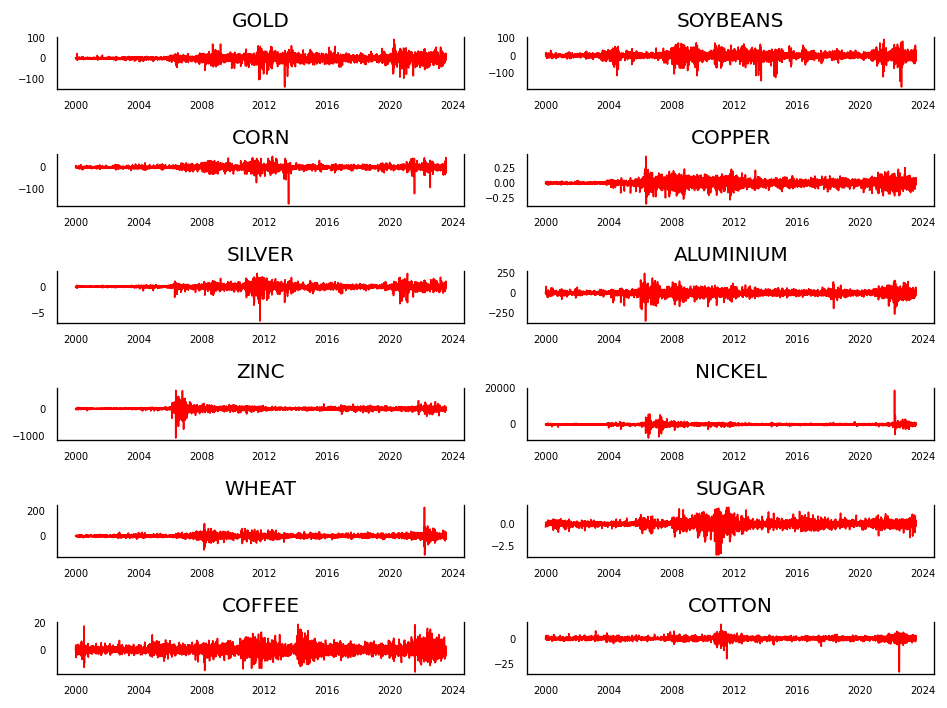

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
  d = X_train_transformed[X_train_transformed.columns[i]]
  ax.plot(d, color='red', linewidth=1)
  ax.set_title(df1.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines['top'].set_alpha(0)
  ax.tick_params(labelsize=6)
  plt.tight_layout();

# You can see what the transformed data looks like:
# At first sight, they seem stationary if I compare them with the previous graphs.

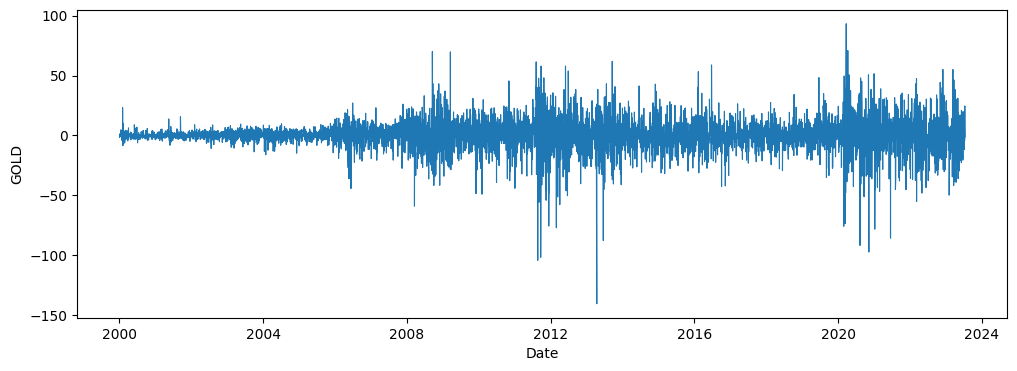

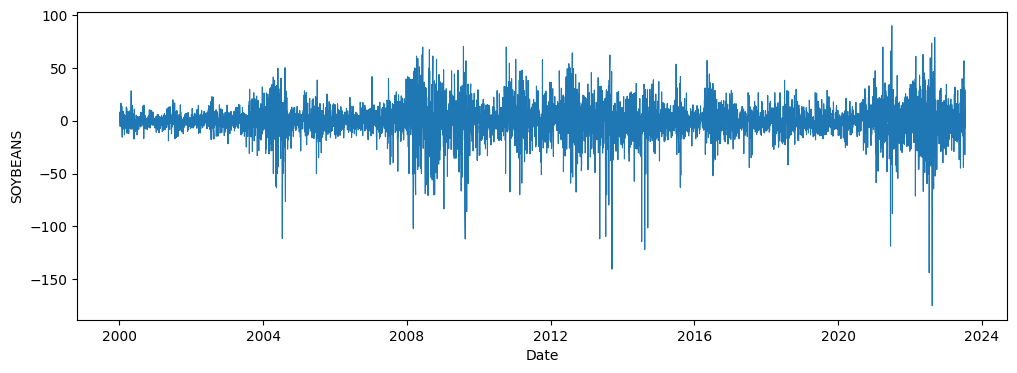

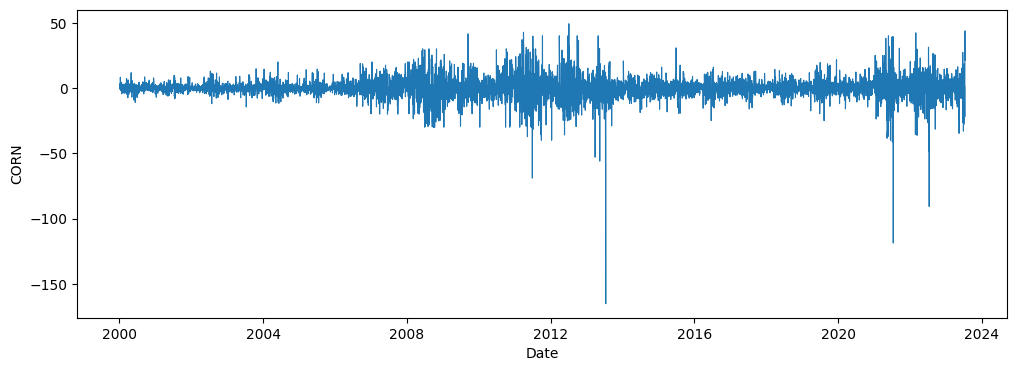

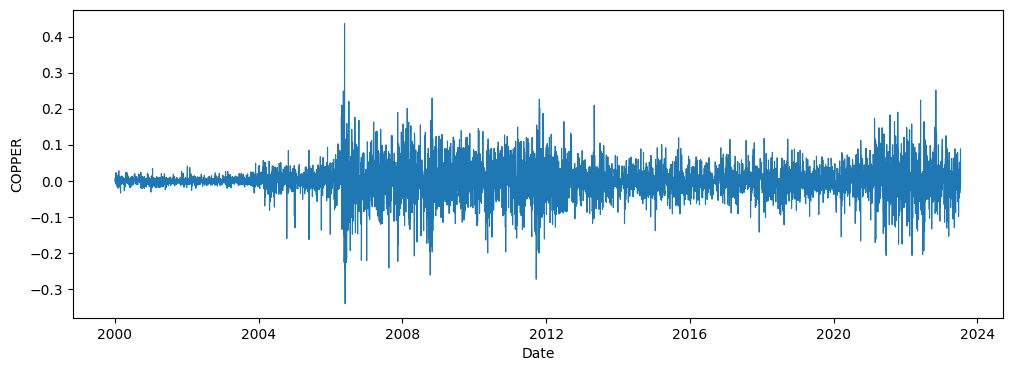

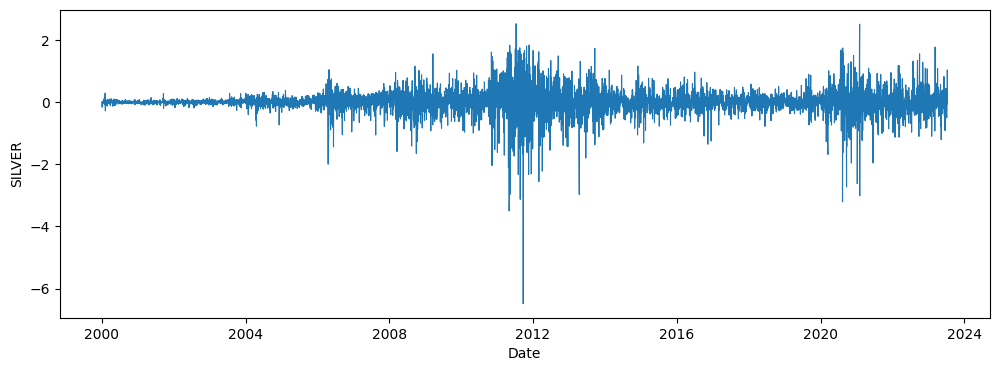

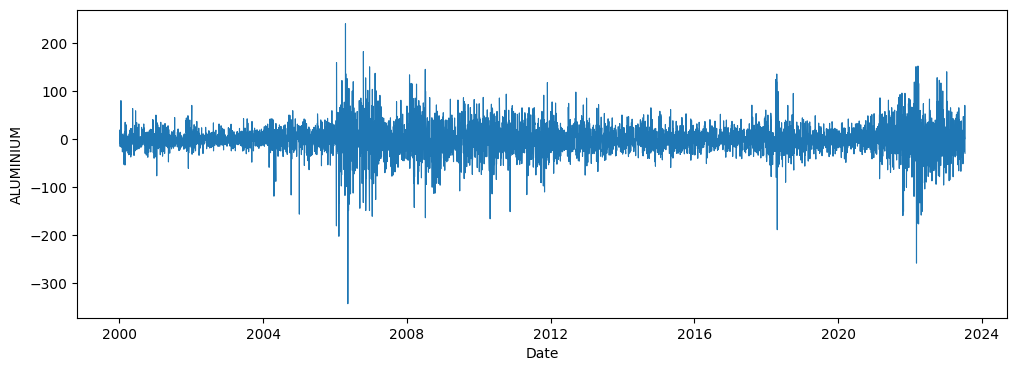

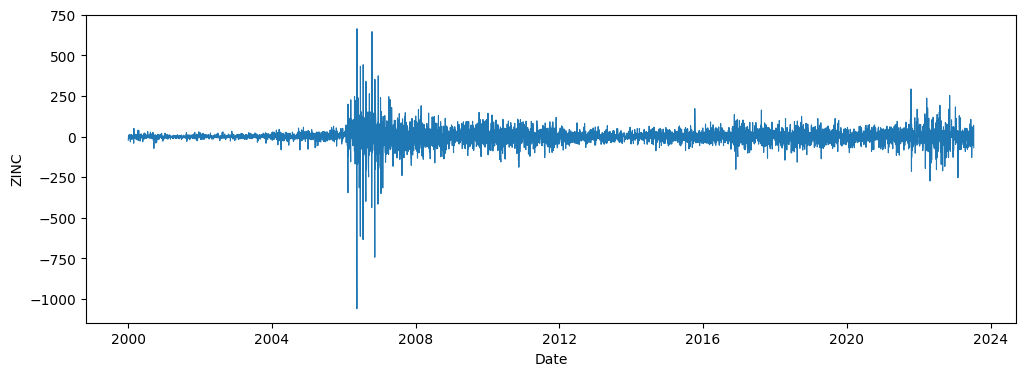

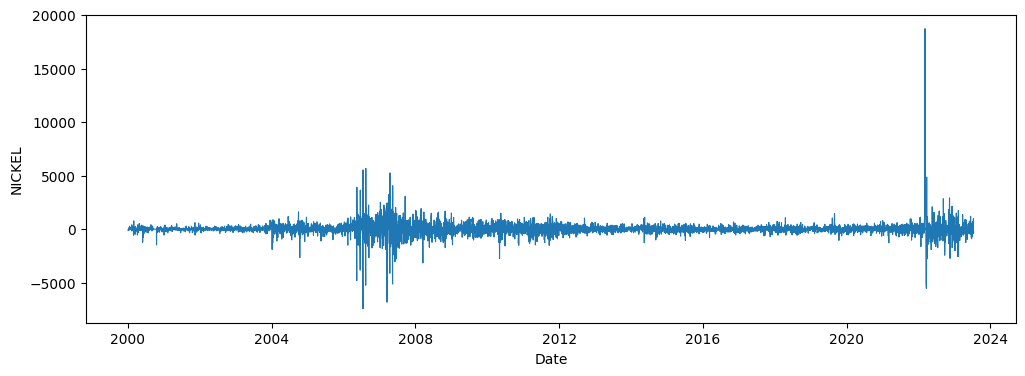

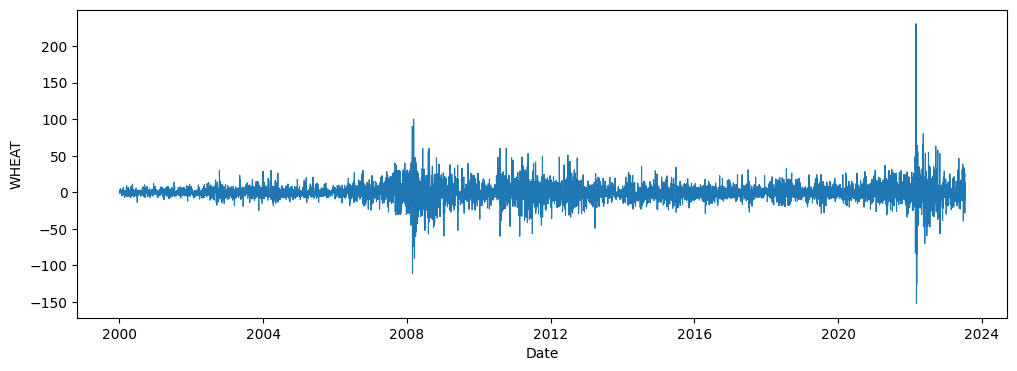

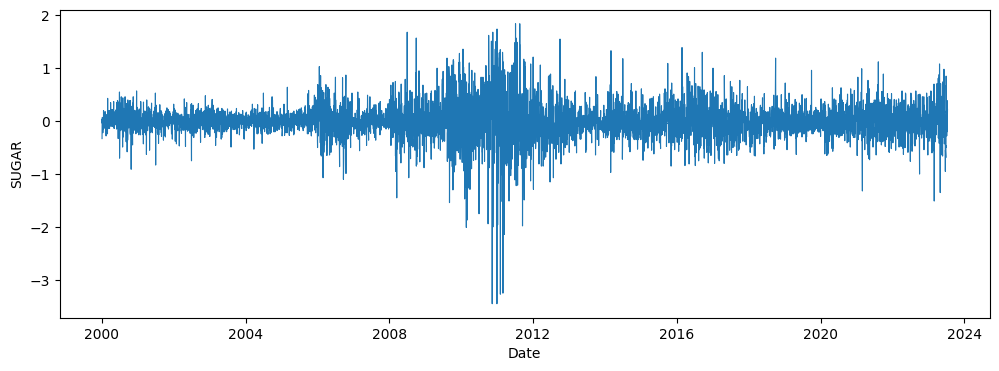

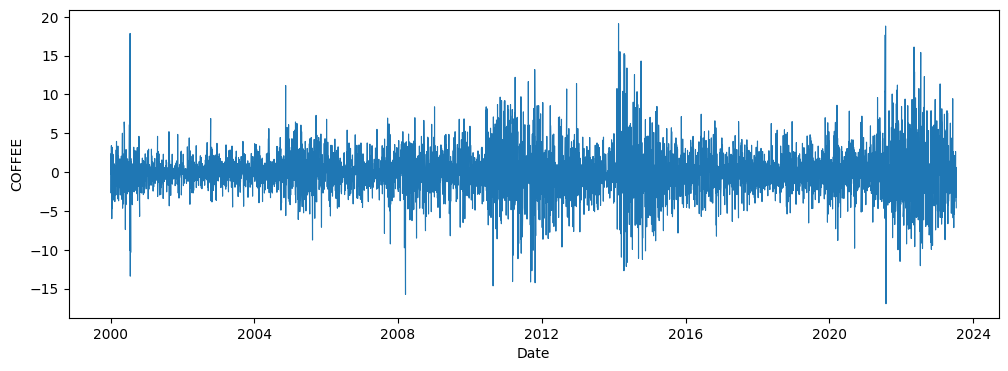

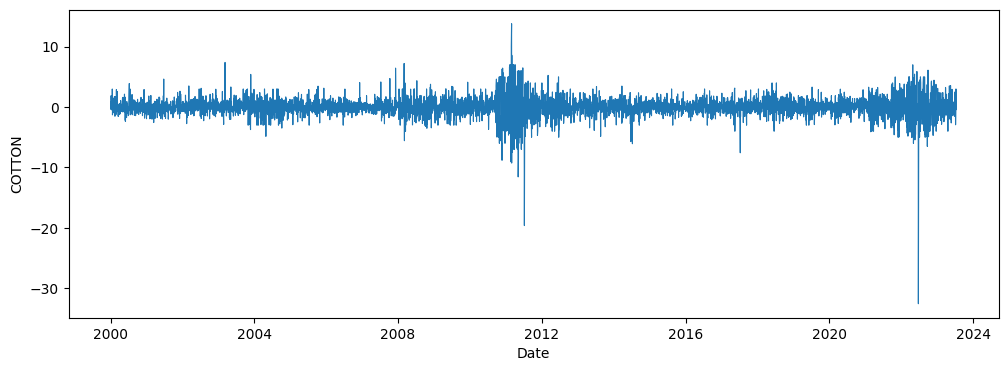

In [ ]:
# More detailed graphics
# The peaks that are observed can raise doubts about whether stationarity is met or not.

for i in list:
  fig, ax = plt.subplots(figsize = (12,4))
  sns.lineplot(data = X_train_transformed, y= i, x= 'Date', linewidth= .8)
  plt.show()

I apply the Dickey Fuller test again but with the transformed (differentiated) data:

In [ ]:
print('Augmented Dickey-Fuller Test:')
print('Time series: Price of Gold')
test_dickey_fuller(X_train_transformed['GOLD'])
print('Time series: Price of Silver')
test_dickey_fuller(X_train_transformed['SILVER'])
print('Time series: Price of Soybean')
test_dickey_fuller(X_train_transformed['SOYBEANS'])
print('Time series: Price of Corn')
test_dickey_fuller(X_train_transformed['CORN'])
print('Time series: Price of Copper')
test_dickey_fuller(X_train_transformed['COPPER'])
print('Time series: Price of Aluminum')
test_dickey_fuller(X_train_transformed['ALUMINIUM'])
print('Time series: Price of Zinc')
test_dickey_fuller(X_train_transformed['ZINC'])
print('Time series: Price of Nickel')
test_dickey_fuller(X_train_transformed['NICKEL'])
print('Time series: Price of Wheat')
test_dickey_fuller(X_train_transformed['WHEAT'])
print('Time series: Price of Sugar')
test_dickey_fuller(X_train_transformed['SUGAR'])
print('Time series: Price of Coffee')
test_dickey_fuller(X_train_transformed['COFFEE'])
print('Time series: Price of Cotton')
test_dickey_fuller(X_train_transformed['COTTON'])

Augmented Dickey-Fuller Test:
Time series: Price of Gold
p-value: 0.000000
Time series: Price of Silver
p-value: 0.000000
Time series: Price of Soybean
p-value: 0.000000
Time series: Price of Corn
p-value: 0.000000
Time series: Price of Copper
p-value: 0.000000
Time series: Price of Aluminum
p-value: 0.000000
Time series: Price of Zinc
p-value: 0.000000
Time series: Price of Nickel
p-value: 0.000000
Time series: Price of Wheat
p-value: 0.000000
Time series: Price of Sugar
p-value: 0.000000
Time series: Price of Coffee
p-value: 0.000000
Time series: Price of Cotton
p-value: 0.000000


All p-values ​​are less than 0.05, so it could be concluded that with a single order of differentiation, stationary series are obtained.

# Construction of a VAR model on the transformed series

The VAR requires stationarity of the series, which means that the mean of the series does not change over time.

In [ ]:
model = VAR(X_train_transformed)

## Model order selection

In [ ]:
# With 'select_order()' what I am looking for is to establish what order the model should have.
# Normally a maximum of 10 or 15 is established, as in this case
# As can be seen, there are different criteria: AIC, BIC, FPE, HQIC
#I am going to work with the AIC criterion. Then I look at where the asterisk (*) is located, which establishes the order to select.
# In this case, according to the AIC criterion I must select order 8

modelsel=model.select_order(15)
modelsel.summary()

,AIC,BIC,FPE,HQIC
0,37.23,37.25*,1.481e+16,37.24
1,37.12,37.29,1.317e+16,37.18*
2,37.09,37.42,1.286e+16,37.21
3,37.08,37.57,1.271e+16,37.25
4,37.09,37.73,1.277e+16,37.31
5,37.09,37.89,1.282e+16,37.37
6,37.09,38.05,1.282e+16,37.42
7,37.08,38.20,1.264e+16,37.46
8,37.07*,38.35,1.261e+16*,37.52
9,37.07,38.51,1.262e+16,37.57


## Model tuning

In [ ]:
res = model.fit(maxlags=8, ic='aic')   #Establezco el orden y el criterio
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 10, Sep, 2024
Time:                     13:58:15
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    38.3409
Nobs:                     6131.00    HQIC:                   37.5075
Log likelihood:          -216853.    FPE:                1.25053e+16
AIC:                      37.0649    Det(Omega_mle):     1.03583e+16
--------------------------------------------------------------------
Results for equation GOLD
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.291833         0.161685            1.805           0.071
L1.GOLD             -0.024529         0.019960           -1.229           0.219
L1.SOYBEANS          0.005868         0.012075            0.486  

# Granger Causality

I will apply the Granger Causality test, which is based on a hypothesis testing. Where H0 is that the variable in question that I am studying is not believed to cause the other variables, while H1 states the opposite.<br>
If the p-value is less than 0.05: I reject the null hypothesis H0 and keep the variable within the model.<br>
If I obtain a p-value greater than 0.05, I can propose the idea of ​​eliminating said variable from the model, this is optional, checks must be carried out and a decision must be made based on it. There is nothing established in this regard, just different ways to take into account.

Next, using 'test_causality' I will compare each of the variables with all the others and observe the <u>p-value</u> of each one

### GOLD

In [ ]:
grangercaus=res.test_causality(['SOYBEANS', 'CORN','COPPER','SILVER','ALUMINIUM',
      'ZINC', 'NICKEL', 'WHEAT', 'SUGAR', 'COFFEE', 'COTTON' ],['GOLD'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.819,1.260,0.000,"(88, 72408)"


### SOYBEANS

In [ ]:
grangercaus=res.test_causality(['GOLD','CORN','COPPER','SILVER','ALUMINIUM',
'ZINC', 'NICKEL', 'WHEAT', 'SUGAR', 'COFFEE', 'COTTON' ],['SOYBEANS'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.235,1.260,0.067,"(88, 72408)"


### CORN

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','COPPER','SILVER','ALUMINIUM',
'ZINC', 'NICKEL', 'WHEAT', 'SUGAR', 'COFFEE', 'COTTON' ],['CORN'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
2.064,1.260,0.000,"(88, 72408)"


### COPPER

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','CORN','SILVER','ALUMINIUM',
'ZINC', 'NICKEL', 'WHEAT', 'SUGAR', 'COFFEE', 'COTTON' ],['COPPER'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
2.407,1.260,0.000,"(88, 72408)"


### SILVER

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','CORN','COPPER','ALUMINIUM',
'ZINC', 'NICKEL', 'WHEAT', 'SUGAR', 'COFFEE', 'COTTON' ],['SILVER'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.646,1.260,0.000,"(88, 72408)"


### ALUMINIUM

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','CORN','COPPER','SILVER','ZINC',
'NICKEL', 'WHEAT', 'SUGAR', 'COFFEE', 'COTTON' ],['ALUMINIUM'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
2.529,1.260,0.000,"(88, 72408)"


### ZINC

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','CORN','COPPER','SILVER','ALUMINIUM',
'NICKEL', 'WHEAT', 'SUGAR', 'COFFEE', 'COTTON' ],['ZINC'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
2.233,1.260,0.000,"(88, 72408)"


### NICKEL

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','CORN','COPPER','SILVER','ALUMINIUM',
'ZINC', 'WHEAT', 'SUGAR', 'COFFEE', 'COTTON' ],['NICKEL'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
3.740,1.260,0.000,"(88, 72408)"


### WHEAT

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','CORN','COPPER','SILVER','ALUMINIUM',
'ZINC', 'NICKEL', 'SUGAR', 'COFFEE', 'COTTON' ],['WHEAT'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
4.788,1.260,0.000,"(88, 72408)"


### SUGAR

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','CORN','COPPER','SILVER','ALUMINIUM',
'ZINC', 'NICKEL', 'WHEAT', 'COFFEE', 'COTTON' ],['SUGAR'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.714,1.260,0.000,"(88, 72408)"


### COFFEE

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','CORN','COPPER','SILVER','ALUMINIUM',
'ZINC', 'NICKEL', 'WHEAT', 'SUGAR', 'COTTON' ],['COFFEE'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.580,1.260,0.000,"(88, 72408)"


### COTTON

In [ ]:
grangercaus=res.test_causality(['GOLD','SOYBEANS','CORN','COPPER','SILVER','ALUMINIUM',
'ZINC', 'NICKEL', 'WHEAT', 'SUGAR', 'COFFEE' ],['COTTON'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
2.533,1.260,0.000,"(88, 72408)"


The results are favorable, each of the variables with a small p-value (< 0.05), <u>except for the variable 'SOYBEANS'.</u><br>
Next, I establish a matrix in which it will be possible to clearly observe the estimation of the p-values ​​of each of the variables with the others. If we focus on the 'SOYBEANS' row (the problematic variable) we will see that it does not cause: 'SILVER', 'ALUMINIUM', 'ZINC', 'NICKEL' AND 'COFFEE'. Some of these variables are narrowly missed: 'ALUMINIUM', 'ZINC' have a value of 0.05.<br>
<u>With the information provided by this matrix, I decide that it is not convenient to eliminate the variable 'SOYBEANS', I will continue with all my variables</u>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

maxlag=8
test = 'ssr_chi2test'
def grangers_causality_matrix(X_train_transformed, variables, test = 'ssr_chi2test', verbose=False):
  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(X_train_transformed[[r,c]], maxlag=maxlag, verbose=False)
      p_values = [(test_result[i+1][0][test][1]) for i in range(maxlag)]
      if verbose:
        print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      dataset.loc[r,c] = min_p_value
  dataset.columns = [var + '_x' for var in variables]
  dataset.index = [var + '_y' for var in variables]
  return dataset
grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns)

,GOLD_x,SOYBEANS_x,CORN_x,COPPER_x,SILVER_x,ALUMINIUM_x,ZINC_x,NICKEL_x,WHEAT_x,SUGAR_x,COFFEE_x,COTTON_x
GOLD_y,1.00,0.05,0.07,0.20,0.01,0.44,0.33,0.01,0.00,0.01,0.01,0.51
SOYBEANS_y,0.01,1.00,0.00,0.01,0.06,0.05,0.05,0.21,0.00,0.02,0.14,0.03
CORN_y,0.01,0.08,1.00,0.03,0.20,0.03,0.49,0.02,0.00,0.07,0.03,0.00
COPPER_y,0.38,0.03,0.14,1.00,0.15,0.33,0.00,0.00,0.00,0.01,0.32,0.13
SILVER_y,0.00,0.00,0.00,0.05,1.00,0.49,0.28,0.00,0.00,0.00,0.00,0.01
ALUMINIUM_y,0.02,0.00,0.08,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.08,0.08
ZINC_y,0.00,0.00,0.07,0.00,0.00,0.00,1.00,0.00,0.00,0.05,0.01,0.01
NICKEL_y,0.00,0.00,0.00,0.02,0.01,0.00,0.00,1.00,0.00,0.09,0.27,0.00
WHEAT_y,0.03,0.39,0.00,0.17,0.05,0.13,0.23,0.00,1.00,0.10,0.00,0.00
SUGAR_y,0.15,0.00,0.08,0.32,0.01,0.64,0.31,0.53,0.28,1.00,0.11,0.00


# Model diagnosis

To carry out the diagnosis of the model, the main thing is to study its residuals.

## Residuals

In [ ]:
# res is my adjusted model

residuals=res.resid

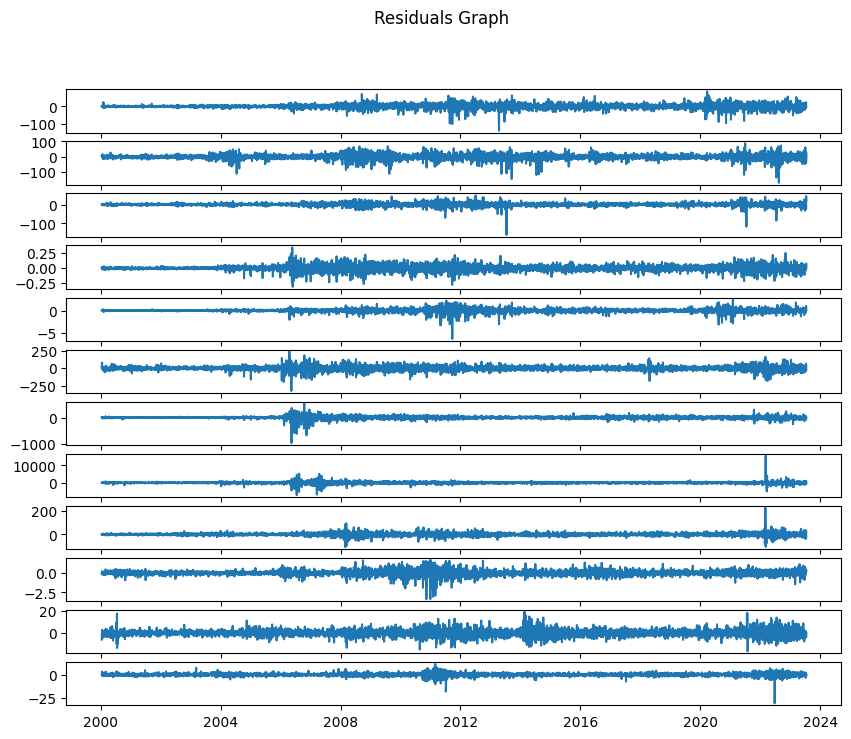

In [ ]:
# With the graph of the residuals I am going to check if these are WHITE NOISE. That is, if they present autocorrelations, if the mean is constant,
# if the variance is constant, observe how these graphs look and then apply the Dickey-Fuller test to see if they are stationary.
# I have 12 variables so I am going to obtain 12 graphs with time series of residuals, one graph for each variable
# White noise can be observed in most graphs except for some peaks

fig, axs = plt.subplots(12)
fig.suptitle('Residuals Graph',fontsize=12)
fig.set_size_inches(10,8)
[axs[i].plot(residuals.iloc[:,i]) for i in range(12)]
plt.show()

## Dickey - Fuller Test applied to Residuals

In [ ]:
print('Dickey-Fuller test of Residuals, p-values: ')
[sts.adfuller(residuals.iloc[:,i])[1] for i in range(12)]

Dickey-Fuller test of Residuals, p-values: 


[0.0,
 0.0,
 6.555515107402699e-26,
 0.0,
 2.3246244494513676e-28,
 2.119368888023416e-23,
 1.3788948724118572e-28,
 1.396750869604825e-28,
 3.427371441108473e-30,
 2.7936215061367385e-22,
 0.0,
 0.0]

All p-values ​​are less than 0.05, therefore the null hypothesis that the 12 series of residuals are not stationary is rejected. With 95% confidence it is believed that they are stationary

## Autocorrelation functions (ACF) of the residuals

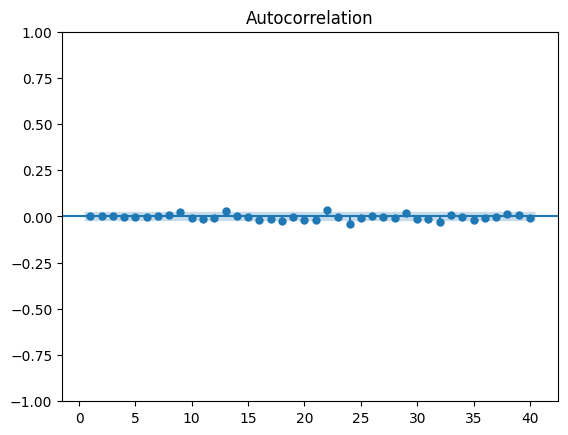

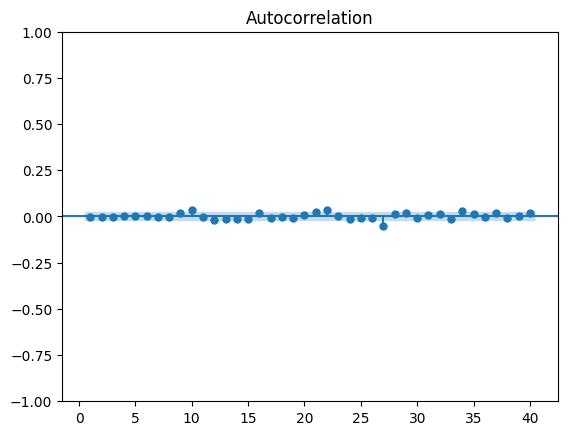

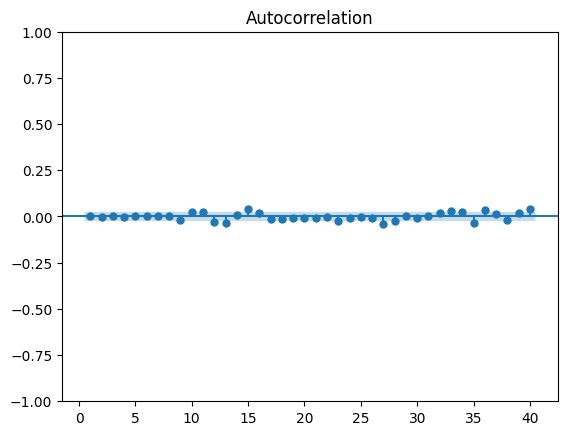

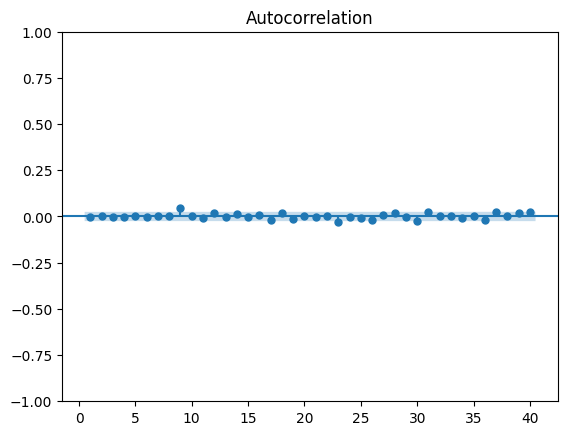

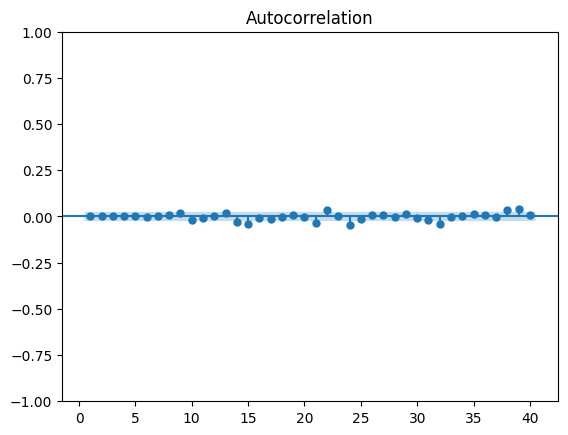

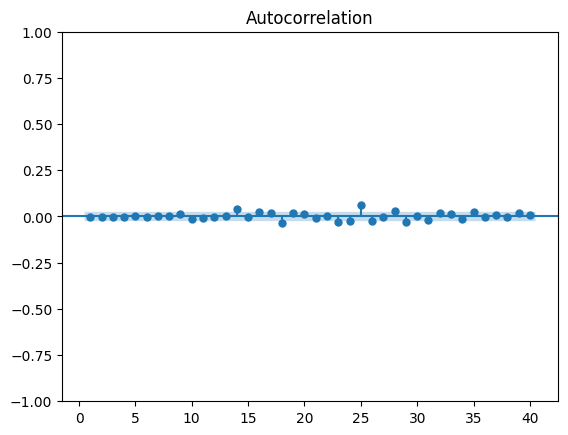

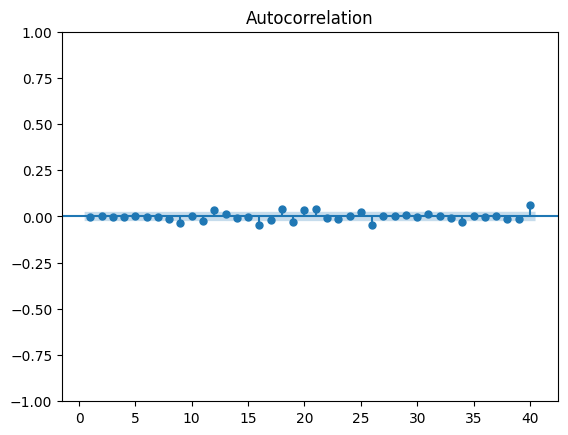

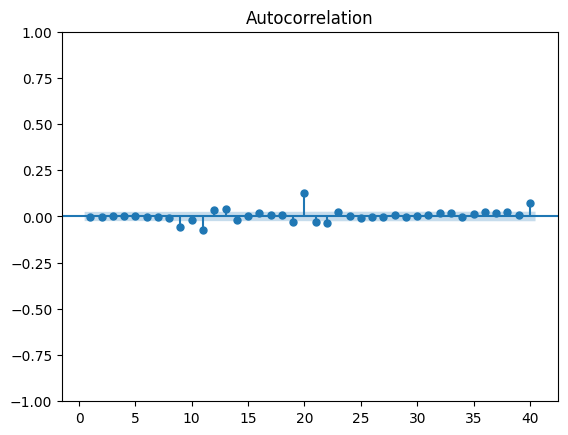

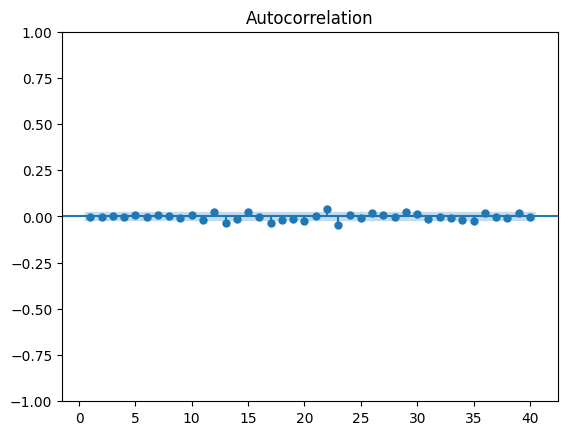

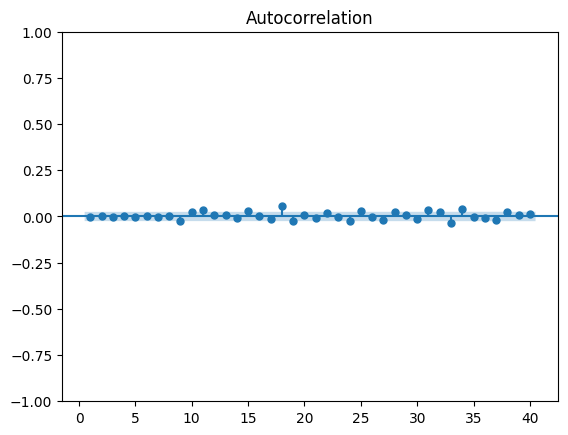

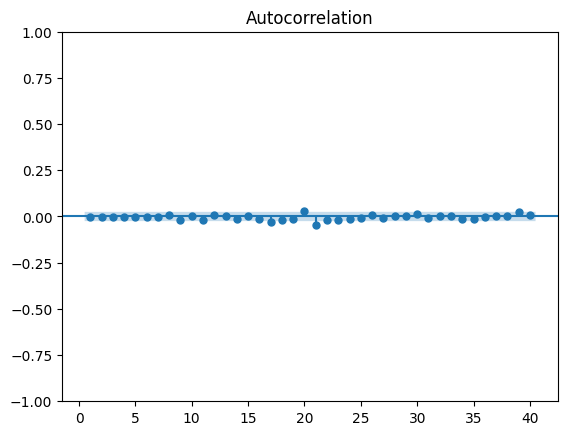

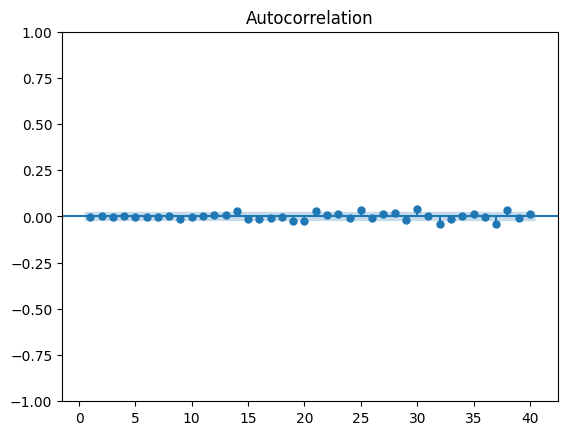

In [ ]:
# The autocorrelation functions are drawn for each of the series
# In all graphs, values ​​within the shaded area predominate, so they are values ​​very close to 0.
# Autocorrelation significantly equal to 0 means no autocorrelation.
# There are few points that stand out from the shaded area and they have a very small value, far from 0.05. So I don't worry about them.

[sgt.plot_acf(residuals.iloc[:,i], zero = False, lags = 40) for i in range(12)]
plt.show()

<u>Conclusion:</u> The residuals of the model do not present an autocorrelation structure, they are stationary according to the results of the augmented Dickey - Fuller test and in the graphs this can be verified visually, then it can be concluded that they are white noise, as is desirable.

## Predicted values

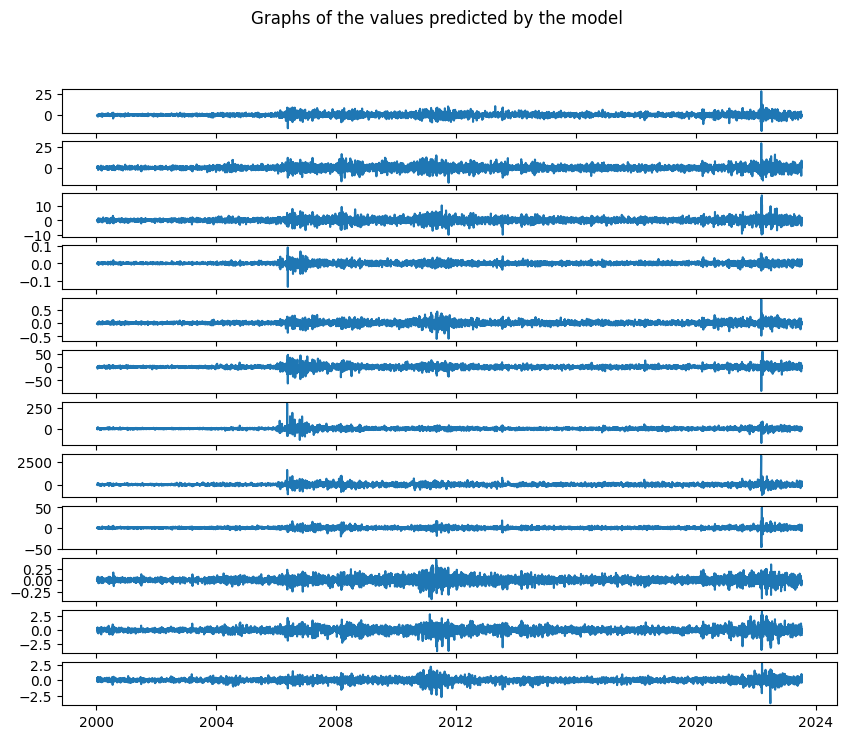

In [ ]:

y_fit = res.fittedvalues                                                          # Predicted values ​​are saved
fig, axs = plt.subplots(12)
fig.suptitle('Graphs of the values ​​predicted by the model',fontsize=12)
fig.set_size_inches(10,8)
[axs[i].plot(y_fit.iloc[:,i]) for i in range(12)]
plt.show()


It must be taken into account, beyond the results that these graphs show, that they are not the real prices as they were at the beginning. <u>These are price transformations</u>. When I try to obtain the forecasts for the future I will not be able to interpret them, the differentiation transformation that was done previously will have to be undone.<br>
This will be done next.

# The FORECAST

## Finding the forecasts

I pass to the VAR model the lag order number of observations from the past data, because the terms in the VAR model are essentially the lags of the various time series in the data set. Therefore it should be provided with as many prior values ​​as indicated by the lag order used by the model. Otherwise you would be introducing little credibility.

In [ ]:
# Get model order
lag_order = res.k_ar
print('The model order:', lag_order)

# Input data for forecasting
input_data = X_train_transformed.values[-lag_order:]                                 # It will predict the last 15 data
# Forecasting
pred = res.forecast(y=input_data, steps=n_obs)                                       # with 'steps' I establish how many future periods I want to forecast from the last period of the input data
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))    # I create a df to compare the data reserved in X_test with the predictions
print('Predictions:')
pred

The model order: 8
Predictions:


,GOLD_pred,SOYBEANS_pred,CORN_pred,COPPER_pred,SILVER_pred,ALUMINIUM_pred,ZINC_pred,NICKEL_pred,WHEAT_pred,SUGAR_pred,COFFEE_pred,COTTON_pred
Date,,,,,,,,,,,,
2023-07-17,-1.84,0.81,2.92,0.00,-0.04,11.06,12.27,-153.07,8.54,0.02,-0.55,0.03
2023-07-18,-5.09,-0.57,-0.77,-0.02,-0.06,-0.06,1.95,150.73,3.83,0.03,0.75,0.02
2023-07-19,2.58,5.59,-0.04,0.01,0.14,2.82,15.88,-23.16,-4.24,0.08,0.30,-0.38
2023-07-20,-2.14,-0.76,-0.42,0.00,-0.02,-0.65,5.15,192.51,2.89,-0.06,-0.89,0.21
2023-07-21,0.08,3.31,-0.42,0.00,0.04,3.57,-3.64,69.73,-1.50,-0.04,1.15,0.54
2023-07-24,3.41,5.87,2.26,-0.00,0.14,3.77,-6.96,-146.18,0.84,0.13,0.17,-0.11
2023-07-25,-1.50,0.01,-1.34,-0.00,-0.03,-0.73,2.70,-13.24,-2.27,-0.01,0.18,-0.31
2023-07-26,-1.43,-1.18,-0.72,-0.00,-0.01,2.57,3.20,14.40,-0.13,-0.04,-0.05,-0.19
2023-07-27,0.18,0.53,0.26,0.00,0.01,-0.60,-1.89,47.66,0.77,-0.00,0.14,0.06


<Figure size 1600x1400 with 0 Axes>

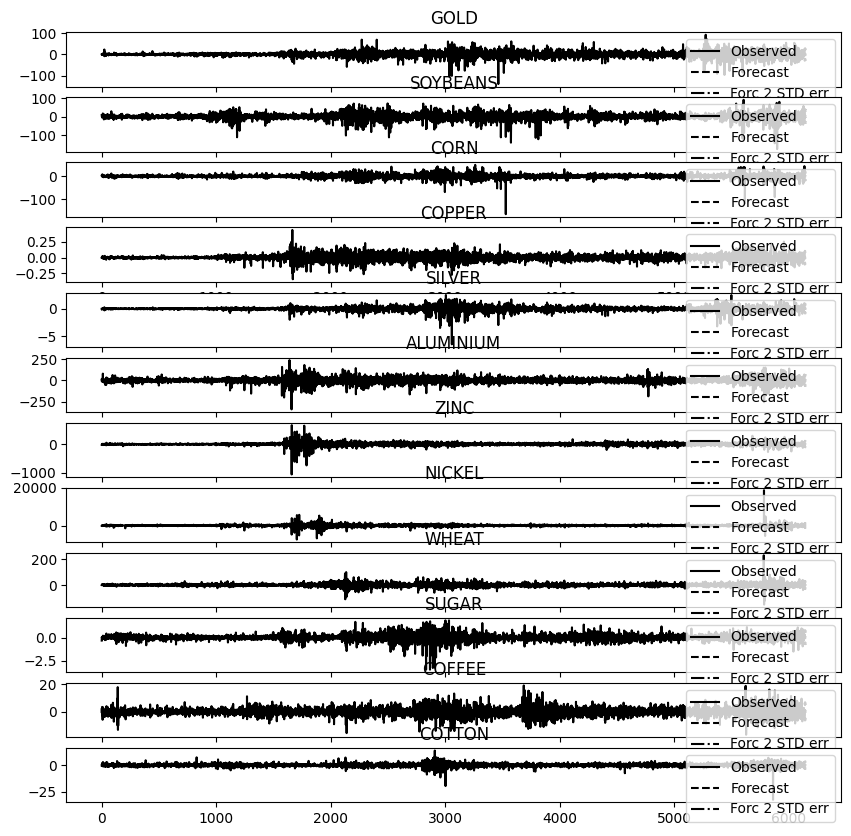

In [ ]:
plt.figure(figsize = (16,14))
res.plot_forecast(15)
#plt.tight_layout(h_pad = 0.25)
plt.show()

As mentioned before, what is obtained are stationary series that cannot be interpreted.

## Reversing the transformation of forecasts to the original scale

Forecasts are generated at the scale of the training data used by the model, that is, they are transformed data. So to put them back on their original scale, I have to de-differentiate them. The way to reverse the differentiation is to add these differences consecutively to the base number. An easy way to do this is to first determine the cumulative sum and then add it to the base number.<br>
This process can be reversed by adding the observation at the previous time step to the difference value. inverted(ts) = differenced(ts) + observation(ts-1).

In [ ]:
# Reversing the transformation

def invert_transformation(X_train, pred):
  forecast = pred.copy()
  columns = X_train.columns
  for col in columns:
    forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()    # accumulated sums
  return forecast

output = invert_transformation(X_train, pred)
output

,GOLD_pred,SOYBEANS_pred,CORN_pred,COPPER_pred,SILVER_pred,ALUMINIUM_pred,ZINC_pred,NICKEL_pred,WHEAT_pred,SUGAR_pred,COFFEE_pred,COTTON_pred
Date,,,,,,,,,,,,
2023-07-17,"1,960.66","1,512.31",617.67,3.92,24.87,"2,220.57","2,404.52","20,656.93",662.29,24.25,154.20,82.74
2023-07-18,"1,955.57","1,511.74",616.90,3.90,24.81,"2,220.51","2,406.48","20,807.66",666.12,24.28,154.95,82.76
2023-07-19,"1,958.15","1,517.32",616.87,3.92,24.95,"2,223.33","2,422.36","20,784.51",661.88,24.36,155.25,82.39
2023-07-20,"1,956.01","1,516.57",616.45,3.92,24.93,"2,222.68","2,427.51","20,977.01",664.76,24.30,154.36,82.60
2023-07-21,"1,956.09","1,519.88",616.03,3.92,24.97,"2,226.24","2,423.87","21,046.74",663.26,24.26,155.52,83.14
2023-07-24,"1,959.50","1,525.74",618.29,3.92,25.11,"2,230.02","2,416.90","20,900.55",664.10,24.38,155.69,83.03
2023-07-25,"1,957.99","1,525.75",616.95,3.92,25.09,"2,229.29","2,419.60","20,887.31",661.83,24.37,155.87,82.72
2023-07-26,"1,956.57","1,524.57",616.23,3.92,25.07,"2,231.86","2,422.80","20,901.71",661.70,24.34,155.82,82.53
2023-07-27,"1,956.75","1,525.11",616.49,3.92,25.08,"2,231.26","2,420.91","20,949.38",662.47,24.33,155.97,82.59


**Now I do have the data in its original scale**

Below I will publish the predicted values, selecting a variable from each of the groups:

*   Precious metals
*   Grains

*   Industrial metals
*   Softs

### <u>Gold</u> Forecast

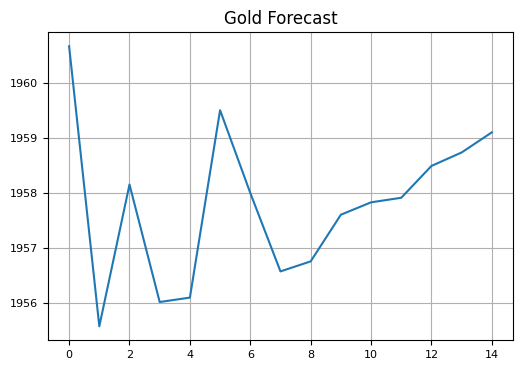

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(output.iloc[:,0])
plt.tick_params(labelsize = 8)
plt.title('Gold Forecast')
plt.grid()
plt.show()

### <u>Silver</u> Forecast

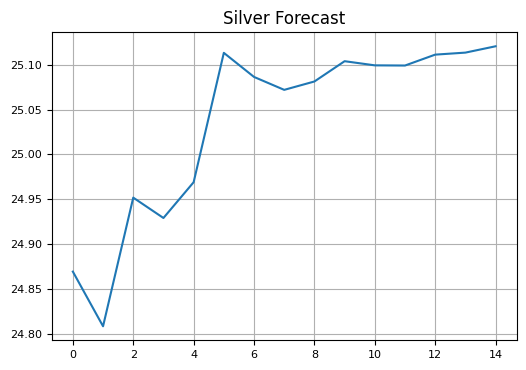

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(output.iloc[:,4])
plt.tick_params(labelsize = 8)
plt.title('Silver Forecast')
plt.grid()
plt.show()

### <u>Copper</u> Forecasts

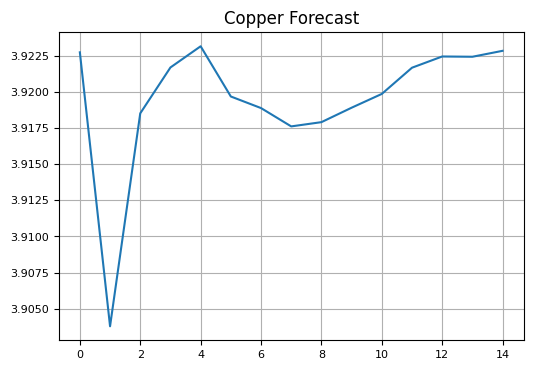

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(output.iloc[:,3])
plt.tick_params(labelsize = 8)
plt.title('Copper Forecast')
plt.grid()
plt.show()

### <u>Soybean</u> Forecasts

I have selected the variable 'SOYBEANS' mainly because it is the only one that has not passed the Granger Causality Test. It will be seen later, during the evaluation, that it is the variable with the worst metrics.

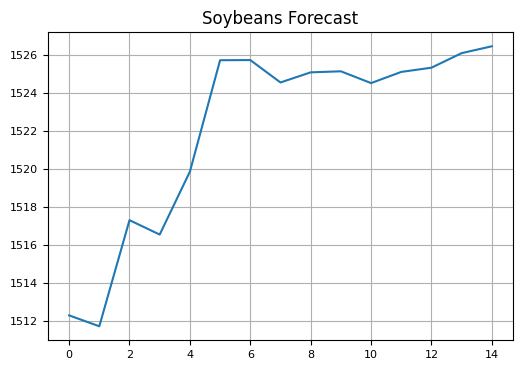

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(output.iloc[:,1])
plt.tick_params(labelsize = 8)
plt.title('Soybeans Forecast')
plt.grid()
plt.show()

### <u>Sugar</u> Forecasts

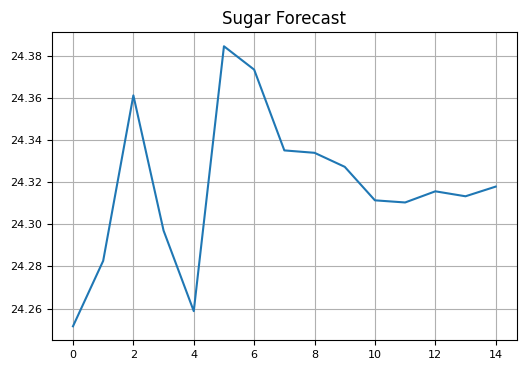

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(output.iloc[:,9])
plt.tick_params(labelsize = 8)
plt.title('Sugar Forecast')
plt.grid()
plt.show()

Next I compare the predicted data with the test data within the same dataset. It is known in advance what values ​​the prices of the variables have taken on the predicted dates and have been reserved precisely to be compared with the predicted values.

In [ ]:
# Gold

join_GOLD = pd.concat([output['GOLD_pred'], X_test['GOLD']], axis=1)
join_GOLD = join_GOLD.reset_index()
join_GOLD = join_GOLD.sort_values(by='Date', ascending=False)
join_GOLD

,Date,GOLD_pred,GOLD
14,2023-08-04,"1,959.09","1,939.00"
13,2023-08-03,"1,958.73","1,932.00"
12,2023-08-02,"1,958.48","1,937.40"
11,2023-08-01,"1,957.91","1,940.70"
10,2023-07-31,"1,957.82","1,970.50"
9,2023-07-28,"1,957.60","1,960.00"
8,2023-07-27,"1,956.75","1,945.70"
7,2023-07-26,"1,956.57","1,970.10"
6,2023-07-25,"1,957.99","1,963.70"
5,2023-07-24,"1,959.50","1,962.20"


In [ ]:
# Silver

join_SILVER = pd.concat([output['SILVER_pred'], X_test['SILVER']], axis=1)
join_SILVER = join_SILVER.reset_index()
join_SILVER = join_SILVER.sort_values(by='Date', ascending=False)
join_SILVER

,Date,SILVER_pred,SILVER
14,2023-08-04,25.12,23.68
13,2023-08-03,25.11,23.70
12,2023-08-02,25.11,23.87
11,2023-08-01,25.10,24.33
10,2023-07-31,25.10,24.97
9,2023-07-28,25.10,24.48
8,2023-07-27,25.08,24.24
7,2023-07-26,25.07,24.82
6,2023-07-25,25.09,24.68
5,2023-07-24,25.11,24.44


In [ ]:
# Copper

join_COPPER = pd.concat([output['COPPER_pred'], X_test['COPPER']], axis=1)
join_COPPER = join_COPPER.reset_index()
join_COPPER = join_COPPER.sort_values(by='Date', ascending=False)
join_COPPER

,Date,COPPER_pred,COPPER
14,2023-08-04,3.92,3.86
13,2023-08-03,3.92,3.90
12,2023-08-02,3.92,3.84
11,2023-08-01,3.92,3.91
10,2023-07-31,3.92,4.01
9,2023-07-28,3.92,3.91
8,2023-07-27,3.92,3.86
7,2023-07-26,3.92,3.89
6,2023-07-25,3.92,3.90
5,2023-07-24,3.92,3.84


In [ ]:
# Soybeans

join_SOYBEANS = pd.concat([output['SOYBEANS_pred'], X_test['SOYBEANS']], axis=1)
join_SOYBEANS = join_SOYBEANS.reset_index()
join_SOYBEANS = join_SOYBEANS.sort_values(by='Date', ascending=False)
join_SOYBEANS

,Date,SOYBEANS_pred,SOYBEANS
14,2023-08-04,"1,526.48","1,441.00"
13,2023-08-03,"1,526.12","1,428.75"
12,2023-08-02,"1,525.35","1,429.75"
11,2023-08-01,"1,525.13","1,446.75"
10,2023-07-31,"1,524.54","1,445.75"
9,2023-07-28,"1,525.16","1,506.75"
8,2023-07-27,"1,525.11","1,532.00"
7,2023-07-26,"1,524.57","1,546.25"
6,2023-07-25,"1,525.75","1,515.50"
5,2023-07-24,"1,525.74","1,523.25"


In [ ]:
# Sugar

join_SUGAR = pd.concat([output['SUGAR_pred'], X_test['SUGAR']], axis=1)
join_SUGAR = join_SUGAR.reset_index()
join_SUGAR = join_SUGAR.sort_values(by='Date', ascending=False)
join_SUGAR

,Date,SUGAR_pred,SUGAR
14,2023-08-04,24.32,23.78
13,2023-08-03,24.31,24.02
12,2023-08-02,24.32,24.20
11,2023-08-01,24.31,24.39
10,2023-07-31,24.31,24.11
9,2023-07-28,24.33,23.99
8,2023-07-27,24.33,24.43
7,2023-07-26,24.34,24.39
6,2023-07-25,24.37,24.69
5,2023-07-24,24.38,24.92


The results show that the value of the prices are very similar, the magnitude is the same, they are not too far apart.

It is interesting to be able to observe past data together with predictions in the graphs; these provide more complete information:


*  Colored in blue the training data, data from the past.
*   Predictions in red



In [ ]:
output.columns=['GOLD',	'SOYBEANS',	'CORN',	'COPPER',	'SILVER',	'ALUMINIUM',
                'ZINC',	'NICKEL',	'WHEAT',	'SUGAR',	'COFFEE',	'COTTON']
output=output.reset_index(drop=True)
X_train=X_train.reset_index(drop=True)
combineall = pd.concat([X_train, output], axis=0)
combineall=combineall.reset_index(drop=True)
combineall

,GOLD,SOYBEANS,CORN,COPPER,SILVER,ALUMINIUM,ZINC,NICKEL,WHEAT,SUGAR,COFFEE,COTTON
0,283.70,456.50,200.75,0.85,5.38,"1,617.50","1,237.50","8,446.00",247.50,6.10,116.50,51.07
1,283.70,464.25,203.00,0.85,5.38,"1,617.50","1,215.00","8,314.00",247.25,5.77,116.25,50.73
2,282.10,469.25,203.00,0.86,5.21,"1,636.50","1,209.25","8,307.00",249.75,5.81,118.60,51.56
3,282.40,468.00,203.75,0.85,5.17,"1,639.75","1,212.00","8,252.00",248.50,5.77,116.85,52.08
4,282.90,471.50,207.00,0.85,5.20,"1,652.00","1,209.25","8,174.00",251.75,5.84,114.15,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...
6150,"1,957.82","1,524.54",616.62,3.92,25.10,"2,231.44","2,422.93","20,973.81",662.92,24.31,155.96,82.57
6151,"1,957.91","1,525.13",617.10,3.92,25.10,"2,232.47","2,421.90","20,953.86",663.11,24.31,155.96,82.61
6152,"1,958.48","1,525.35",617.12,3.92,25.11,"2,233.35","2,422.33","20,959.83",663.43,24.32,155.95,82.64
6153,"1,958.73","1,526.12",617.19,3.92,25.11,"2,233.12","2,422.90","20,966.35",663.51,24.31,155.91,82.64


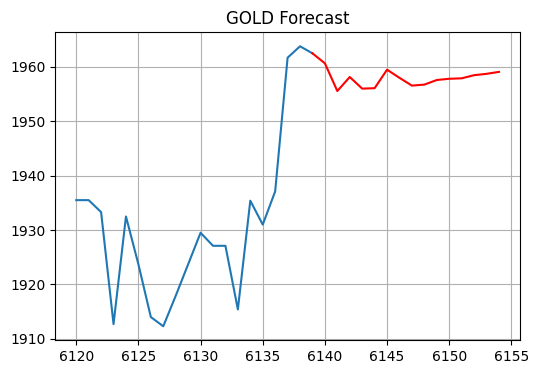

<Figure size 640x480 with 0 Axes>

In [ ]:
                            # GOLD
plt.figure(figsize = (6,4))
plt.plot(combineall.iloc[6120:6140,0])
plt.plot(combineall.iloc[6139:,0],color='red')
plt.title('GOLD Forecast')
plt.grid()
plt.show()

plt.savefig('gold.png')

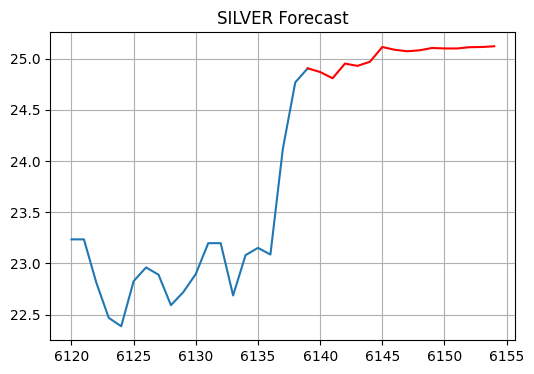

In [ ]:
                          # SILVER
plt.figure(figsize = (6,4))
plt.plot(combineall.iloc[6120:6140,4])
plt.plot(combineall.iloc[6139:,4],color='red')
plt.title('SILVER Forecast')
plt.grid()
plt.show()

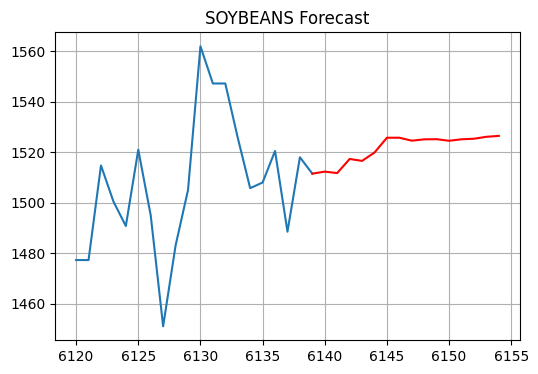

In [ ]:
                        # SOYBEANS
plt.figure(figsize = (6,4))
plt.plot(combineall.iloc[6120:6140,1])
plt.plot(combineall.iloc[6139:,1],color='red')
plt.title('SOYBEANS Forecast')
plt.grid()
plt.show()

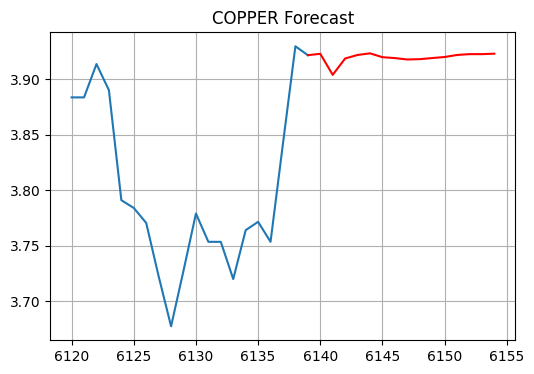

In [ ]:
                          # COPPER
plt.figure(figsize = (6,4))
plt.plot(combineall.iloc[6120:6140,3])
plt.plot(combineall.iloc[6139:,3],color='red')
plt.title('COPPER Forecast')
plt.grid()
plt.show()

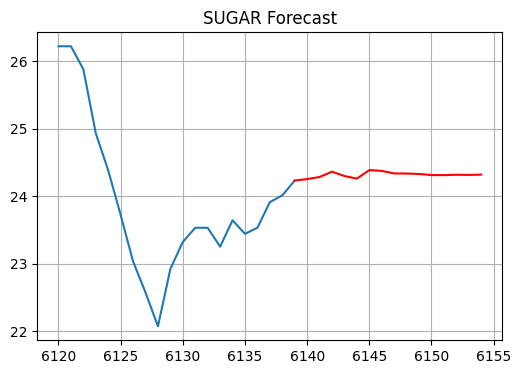

In [ ]:
                          # SUGAR
plt.figure(figsize = (6,4))
plt.plot(combineall.iloc[6120:6140,9])
plt.plot(combineall.iloc[6139:,9],color='red')
plt.title('SUGAR Forecast')
plt.grid()
plt.show()

The next thing would be to have quantitative knowledge of the representative measures of the errors that are being made in the predictions.

# Model evaluation

To evaluate the forecasts I will use the following metrics:



* <u>MAE</u>, mean absolute error
* <u>RMSE</u>, root mean squared error

These are versatile metrics that can be applied to a variety of contexts, typically used to evaluate performance in regression models. It also applies to time series, to evaluate the accuracy of predictive models.

### Evaluation for Gold

In [ ]:
print('Mean absolute error:', mean_absolute_error(join_GOLD['GOLD'].values, join_GOLD['GOLD_pred'].values))

print('Root mean squared error:', np.sqrt(mean_squared_error(join_GOLD['GOLD'].values,
                                              join_GOLD['GOLD_pred'].values)))

Mean absolute error: 13.755125772201518
Root mean squared error: 15.910832980722992


### Evaluation for Silver

In [ ]:
print('Mean absolute error:', mean_absolute_error(join_SILVER['SILVER'].values,
                                                join_SILVER['SILVER_pred'].values))
print('Root mean squared error:', np.sqrt(mean_squared_error(join_SILVER['SILVER'].values,
                                                    join_SILVER['SILVER_pred'].values)))

Mean absolute error: 0.6021101877374029
Root mean squared error: 0.7522466107516659


### Evaluation for Soybeans

In [ ]:
print('Mean absolute error:', mean_absolute_error(join_SOYBEANS['SOYBEANS'].values,
                                              join_SOYBEANS['SOYBEANS_pred'].values))
print('Root mean squared error:', np.sqrt(mean_squared_error(join_SOYBEANS['SOYBEANS'].values,
                                                      join_SOYBEANS['SOYBEANS_pred'].values)))

Mean absolute error: 40.760592806972774
Root mean squared error: 52.91108152128767


### Evaluation for Copper

In [ ]:
print('Mean absolute error:', mean_absolute_error(join_COPPER['COPPER'].values,
                                                join_COPPER['COPPER_pred'].values))
print('Root mean squared error:', np.sqrt(mean_squared_error(join_COPPER['COPPER'].values,
                                                      join_COPPER['COPPER_pred'].values)))

Mean absolute error: 0.06502040330662012
Root mean squared error: 0.0754637955806334


### Evaluation for Sugar

In [ ]:
print('Mean absolute error:', mean_absolute_error(join_SUGAR['SUGAR'].values,
                                              join_SUGAR['SUGAR_pred'].values))
print('Root mean squared error:', np.sqrt(mean_squared_error(join_SUGAR['SUGAR'].values,
                                                      join_SUGAR['SUGAR_pred'].values)))

Mean absolute error: 0.3031916991993678
Root mean squared error: 0.3493785403755912


These are the best measurements of RMSE and MAE that I have obtained for each of the variables, it must be taken into account that the lower the RMSE and MAE values ​​generally indicate a better precision of the model.<br>
To check whether these values ​​are high or low, it would be necessary to have a comparison parameter, that is, compare it with other models to evaluate its relative performance.<br>
I have modified the model on more than one occasion in search of perfecting it, reaching the conclusion that the current model is the one that shows the best results. As a matter of optimizing the notebook and not making it so extensive, I decided not to capture the results of the remaining models in it.<br>
In summary, I am going to comment on the modifications/updates that can be made to the current model to achieve other results:


*   You could start working with all the variables that the csv has, or select some of the ones that I have left out, make a combination between both approaches, among other similar options.
*   When performing the Granger causality test and obtaining one or more problematic variables as a result, as in the case of 'SOYBEANS', one way to follow is to eliminate the variable and start again. This implies:


1.   Eliminate said variable and transform the model.
2.   Create the VAR model with the transformed data without the problematic variable.

3.   Adjust the model
4.   Perform the Granger causality test again (if the values ​​of the variables are appropriate, continue with the process, otherwise you can choose to eliminate a variable whose p-value is > 0.05, starting the cycle again).

5.   Find the forecasts.
6.   Reverse the transformation of the forecasts to the original scale.

7.   Show/graph the results.
8.  Evaluate the model using the same metrics to compare the results with the previous model.


*   Another possibility is to try a different criterion when selecting the order of the model. In my case, the one that worked best was the AIC criterion.
*   Another action that I have carried out is to select a greater number of observations to reserve in X_test. The more periods into the future I select --> the more imprecise the model becomes.









